# Converting Routines to Python

In [ ]:
# Stage 1: data reduction
from fifipy.wavecal import reduceData
rootdir = '../202002WaveCalData/'
reduceData(rootdir)

In [45]:
# Order by:
# - Channel
# - Order
# - Dichroic
# - GC
# - grating position
# - Separate GC/Grat pos  by  gaps of more than 500

from glob import glob as gb
from fifipy.fit import computeSpectra
from fifipy.calib import computeAllWaves
from fifipy.io import saveSlopeFits, readData
import numpy as np
from astropy.io import fits
import os
import re
rootdir = '../202002WaveCalData/'
channel = ['sw','lw']
names = np.arange(1,50)
caldir = '202002WaveCalData_*/'
channel = 'sw'
files_105 = []
files_130 = []
files_1_105 = []
files_1_130 = []
files_2_105 = []
files_2_130 = []
grating_105 = []
grating_130 = []
grating_1_105 = []
grating_1_130 = []
grating_2_105 = []
grating_2_130 = []

for name in names:
    filenames = '*GC'+str(name)+'-*'+channel+'.fits'
    files = sorted(gb(os.path.join(rootdir, caldir, filenames)))
    if len(files) > 0:
        for file in files:
            with fits.open(file) as hdl:
                header = hdl[0].header
                detchan = header['DETCHAN']
                order = header['G_ORD_B']
                grat = header['G_STRT_B']
                dic = header['DICHROIC']
            if (order == 1) & (dic == 105):
                files_1_105.append(file)
                grating_1_105.append(grat)
            elif (order == 1) & (dic == 130):
                files_1_130.append(file)
                grating_1_130.append(grat)
            elif (order == 2) & (dic == 105):
                files_2_105.append(file)
                grating_2_105.append(grat)
            elif (order == 2) & (dic == 130):
                files_2_130.append(file)
                grating_2_130.append(grat)
      
channel = 'lw'
for name in names:
    filenames = '*GC'+str(name)+'-*'+channel+'.fits'
    files = sorted(gb(os.path.join(rootdir, caldir, filenames)))
    if len(files) > 0:
        for file in files:
            with fits.open(file) as hdl:
                header = hdl[0].header
                detchan = header['DETCHAN']
                grat = header['G_STRT_R']
                dic = header['DICHROIC']
            if dic == 105:
                files_105.append(file)
                grating_105.append(grat)
            elif dic == 130:
                files_130.append(file)
                grating_130.append(grat)

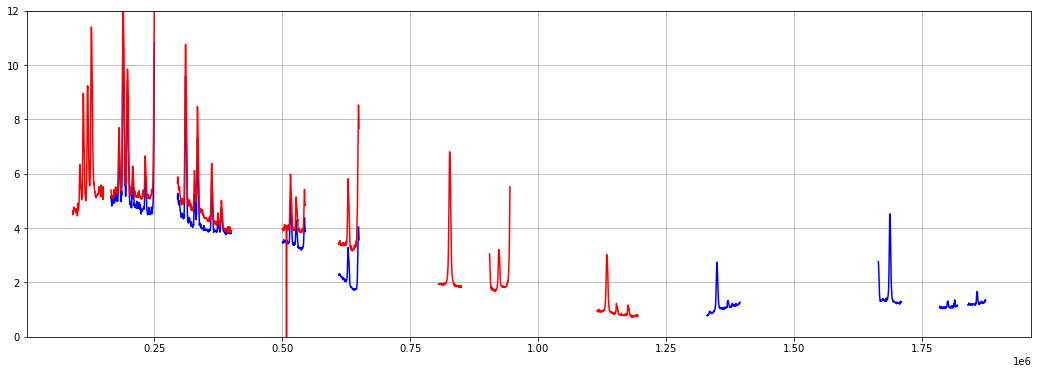

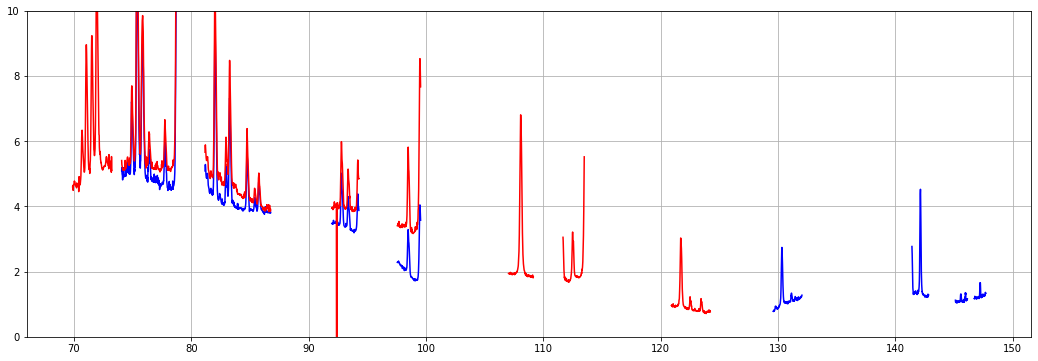

In [10]:
# Central pixel (6,12) for all files B1
from astropy.io import fits
rootdir = '../202002WaveCalData/'
filenames = 'B1*.fits'
files = sorted(gb(os.path.join(rootdir, 'Reduced', filenames)))
fig,ax = plt.subplots(figsize=(18,6))
i = 8
j = 12
for file in files:
    with fits.open(file) as hdl:
        g = hdl['Grating Position'].data
        specs = hdl['SPECS'].data
        header = hdl[0].header
        dichroic = header['DICHROIC']
        if dichroic == 130:
            ax.plot(g, specs[:,i,j], color='red')
        else:
            ax.plot(g, specs[:,i,j], color='blue')
ax.set_ylim(0,12)
ax.grid()
plt.show()

fig,ax = plt.subplots(figsize=(18,6))
for file in files:
    with fits.open(file) as hdl:
        specs = hdl['SPECS'].data
        w = hdl['WAVE'].data
        header = hdl[0].header
        dichroic = header['DICHROIC']
        if dichroic == 130:
            ax.plot(w[:,j,i], specs[:,i,j], color='red')
        else:
            ax.plot(w[:,j,i], specs[:,i,j], color='blue')
ax.set_ylim(0,10)
ax.grid()
plt.show()

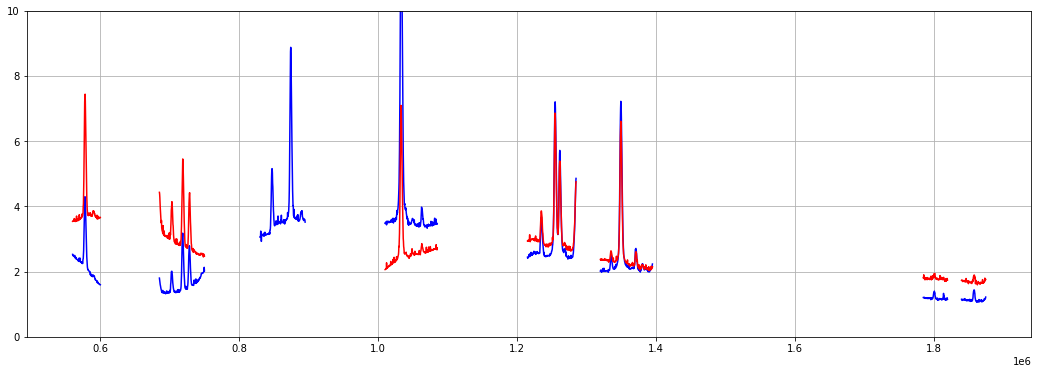

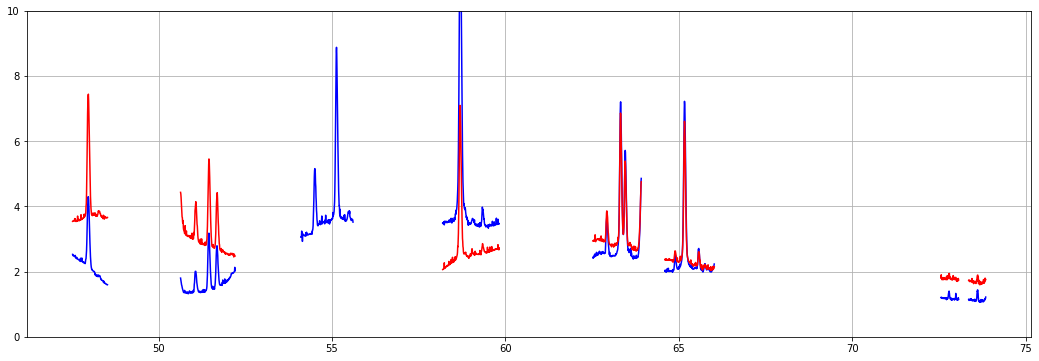

In [12]:
# Central pixel (6,12) for all files B2
from astropy.io import fits
from glob import glob as gb
import matplotlib.pyplot as plt
import os
rootdir = '../202002WaveCalData/'
filenames = 'B2*.fits'
files = sorted(gb(os.path.join(rootdir, 'Reduced', filenames)))
fig,ax = plt.subplots(figsize=(18,6))
i = 8
j = 12
for file in files:
    with fits.open(file) as hdl:
        g = hdl['Grating Position'].data
        specs = hdl['SPECS'].data
        header = hdl[0].header
        dichroic = header['DICHROIC']
        if dichroic == 130:
            ax.plot(g, specs[:,i,j], color='red')
        else:
            ax.plot(g, specs[:,i,j], color='blue')
ax.set_ylim(0,10)
ax.grid()
plt.show()

fig,ax = plt.subplots(figsize=(18,6))
for file in files:
    with fits.open(file) as hdl:
        specs = hdl['SPECS'].data
        w = hdl['WAVE'].data
        header = hdl[0].header
        dichroic = header['DICHROIC']
        if dichroic == 130:
            ax.plot(w[:,j,i], specs[:,i,j], color='red')
        else:
            ax.plot(w[:,j,i], specs[:,i,j], color='blue')
ax.set_ylim(0,10)
ax.grid()
plt.show()





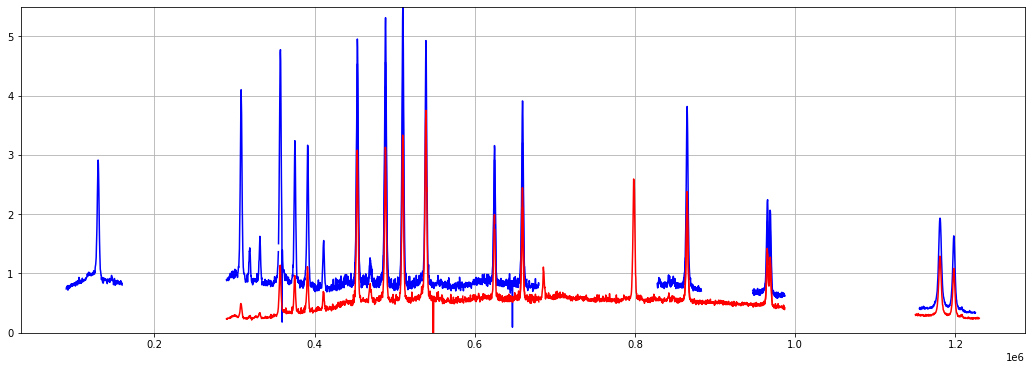

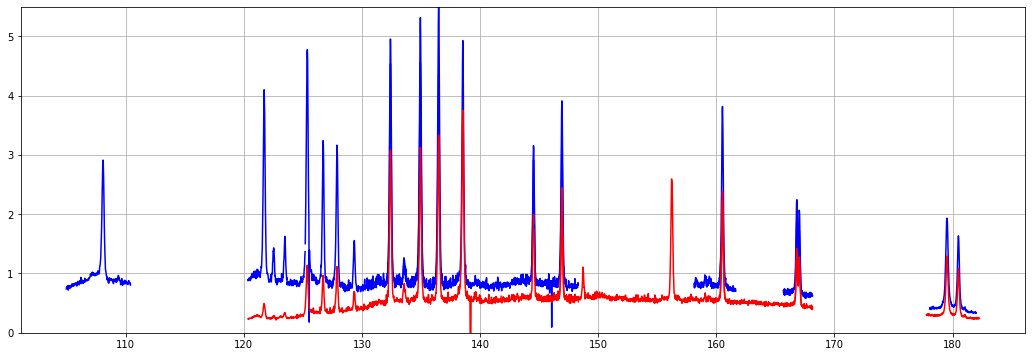

In [9]:
# Central pixel (6,12) for all files R
from astropy.io import fits
rootdir = '../202002WaveCalData/'
filenames = 'R*.fits'
files = sorted(gb(os.path.join(rootdir, 'Reduced', filenames)))
fig,ax = plt.subplots(figsize=(18,6))
i = 8
j = 12
for file in files:
    with fits.open(file) as hdl:
        g = hdl['Grating Position'].data
        specs = hdl['SPECS'].data
        header = hdl[0].header
        dichroic = header['DICHROIC']
        if dichroic == 130:
            ax.plot(g, specs[:,i,j], color='red')
        else:
            ax.plot(g, specs[:,i,j], color='blue')
ax.set_ylim(0,5.5)
ax.grid()
#ax.set_xlim(.3e6,.4e6)
plt.show()


fig,ax = plt.subplots(figsize=(18,6))
for file in files:
    with fits.open(file) as hdl:
        specs = hdl['SPECS'].data
        w = hdl['WAVE'].data
        header = hdl[0].header
        dichroic = header['DICHROIC']
        if dichroic == 130:
            ax.plot(w[:,j,i], specs[:,i,j], color='red')
        else:
            ax.plot(w[:,j,i], specs[:,i,j], color='blue')
ax.set_ylim(0, 5.5)
ax.grid()
plt.show()


In [1]:
# Reduce only one GC group
from fifipy.wavecal import reduceData
rootdir = '../202002WaveCalData/'
reduceData(rootdir,names=[26])


In GC 26 0  there are  251 sw files
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25
In GC 26 1  there are  117 sw files
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11......
In GC 26 0  there are  250 lw files
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........
In GC 26 1  there are  117 lw files
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11......

#### 

# Test for on pixel

In [65]:
from astropy.io import fits
rootdir = '../202002WaveCalData/Reduced/'
infile = rootdir + 'B1_105_GC18_0.fits'

with fits.open(infile) as hdl:
    g = hdl['Grating Position'].data
    w = hdl['WAVE'].data
    dw = hdl['DWAVE'].data
    specs = hdl['SPECS'].data
    header = hdl[0].header
    detchan = header['CHANNEL']
    order = header['ORDER']
    dichroic = header['DICHROIC']
    obsdate = header['OBSDATE']

In [66]:
# Table with lines
import pandas as pd

print('channel, order ', detchan, order)

path = '/home/dario/Python/Fifilab/'
lines = pd.read_csv(path+'water'+detchan+str(order)+'.csv', delimiter=',',header=0,
                    names=['wave','fwhm_air','fwhm_h2o','ok','fwhm_isu'])
#lines

channel, order  BLUE 1


[129.7905 130.3089 131.1272 131.5    132.1667 132.4084]


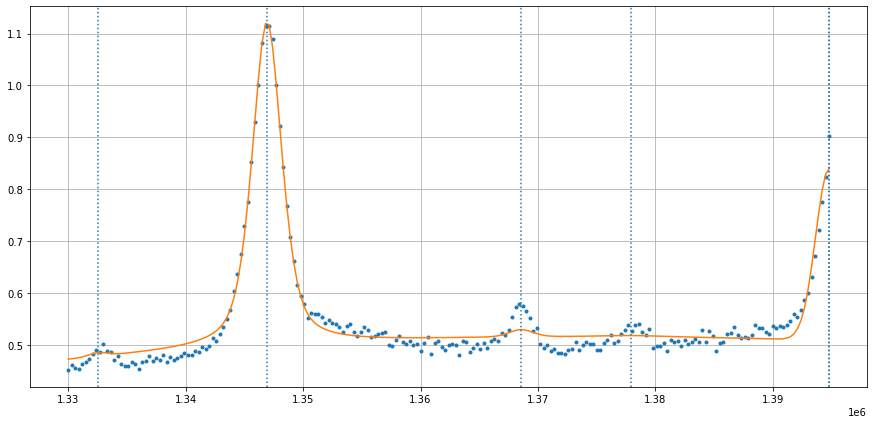

[0, 21.323114428846868, 824.8435406756663, 8286.354877153535, 0, 0]


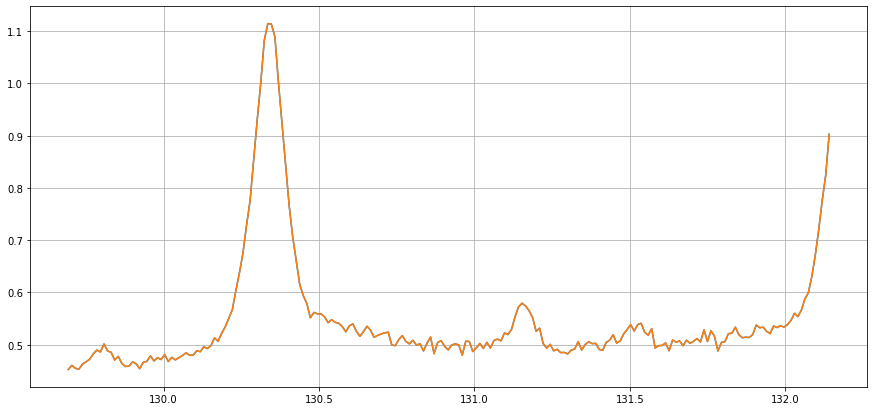

In [67]:
from fifipy.wavecal import fitLines, wlimits
%matplotlib inline
import matplotlib.pyplot as plt

# Pixel      
i = 12 # spectral pixel
j = 24 # spatial pixel
# Range of wavelengths
wcommon, wrange = wlimits(w, i)
wlines = lines.wave.values
fwhms  = lines.fwhm_isu.values
idx =  (wrange[0]-0.5 < wlines) & (wlines < wrange[1]+0.5)
print(wlines[idx])
jout, centers, errors, amplitudes, fwhms, fractions, bestfit = fitLines(wlines[idx], fwhms[idx], g, w, specs, i, j)

fig,ax = plt.subplots(figsize=(15,7))
ax.plot(g, specs[:,i,jout],'.')
ax.plot(g, bestfit)
for c in centers:
    ax.axvline(c,linestyle=':')
ax.grid()
plt.show()

print(errors)

x = w[:,j,i]
y = specs[:,i,j]
fig,ax = plt.subplots(figsize=(15,7))
plt.plot(x,y)
plt.plot(w[:,j,i], specs[:,i,j],label='spec')
plt.grid()
plt.show()

## Notes

B1_105_GC18_0.pdf   OK
B1_105_GC30_0.pdf   Bad pixels
B1_105_GC31_0.pdf   OK
B1_105_GC32_0.pdf   OK
B1_105_GC33_0.pdf   OK
B1_130_GC10_0.pdf   OK, bad pixels
B1_130_GC11_0.pdf   OK, bad pixels
B1_130_GC12_0.pdf   OK, bad pixels
B1_130_GC13_0.pdf   OK
B1_130_GC14_0.pdf   OK
B1_130_GC15_0.pdf   OK - 0 and 15 spexel BAD fit !
B1_130_GC16_0.pdf   OK, bad fit of 2nd line in pixel 15 !
B1_130_GC16_1.pdf   OK

B2_105_GC01_0.pdf   OK   
B2_105_GC02_0.pdf   OK
B2_105_GC03_0.pdf   OK - sometimes bad fit of strong line
B2_105_GC04_0.pdf   OK
B2_105_GC05_0.pdf   OK
B2_105_GC06_1.pdf   OK
B2_105_GC08_0.pdf   OK - fainter line difficult to catch
B2_105_GC08_1.pdf   OK
B2_130_GC22_0.pdf   OK
B2_130_GC23_0.pdf   OK
B2_130_GC24_0.pdf   OK  - fit of strong line can be better (maybe fatter line)
B2_130_GC25_0.pdf   OK
B2_130_GC26_0.pdf   OK
B2_130_GC26_1.pdf   OK
B2_130_GC28_0.pdf   OK

... Note: when computing the continuum, remove also lines just outside of the interval !

R1_105_GC01_0.pdf   146.0-147.8 OK
R1_105_GC02_0.pdf   120.8-124.7 OK .. sometimes skips 122.5
R1_105_GC03_0.pdf   125.7-130.2 OK
R1_105_GC04_0.pdf   134.0-137.8 OK
R1_105_GC05_0.pdf   178.4-181.6 ...  problems to fit 179.5
R1_105_GC06_0.pdf   159.8-161.2 ... fails 4,7 9,9  @ 160.5  848000-882800
R1_105_GC07_0.pdf   166.0-167.7 OK
R1_105_GC08_2.pdf   105.4-109.9 OK
R1_105_GC18_0.pdf   131.1-134.9 OK missed a few fits
R1_105_GC19_0.pdf   143.2-145.5 OK
R1_105_GC20_0.pdf   158.5-160.0 merge with GC6?  Too short --> BAD 828000-862800
R1_105_GC21_0.pdf   158.5-160.0 ?             Too short --> BAD 828000-856800
R1_105_GC30_0.pdf   131.1-136.4 OK  165000 249900
R1_105_GC31_0.pdf   137.2-143.7 OK
R1_105_GC32_0.pdf   144.6-146.8 OK
R1_105_GC33_0.pdf   166.0-167.7 OK
 
R1_130_GC10_0.pdf   119.8-125 OK  continuum bump
R1_130_GC11_0.pdf   124.3-131 OK
R1_130_GC12_0.pdf   130.6-139 ---> merged with 13 in 12_1
R1_130_GC13_0.pdf   139-141.3 ---> merged with 12 in 12_1
R1_130_GC12_1.pdf   OK
R1_130_GC14_0.pdf   145.1-148.7 OK
R1_130_GC15_0.pdf   158.-162
R1_130_GC16_0.pdf   165-168.2
R1_130_GC16_1.pdf   177-182
R1_130_GC22_0.pdf   141.3-144.9
R1_130_GC23_0.pdf   625000 689800 144-149 merge with 24 --> 23_1
R1_130_GC24_0.pdf   690000 765000 149-154 merge with 23 --> 23_1
R1_130_GC25_0.pdf   765000 834900 153-158.9  Merge with 26 ---> 25_1
R1_130_GC26_0.pdf   835000 877900 158-163 OK Merge with 25 ---> 25_1
R1_130_GC25_1.pdf   OK
R1_130_GC26_1.pdf   878200 944800 Merge with 28_0 to 28_1
R1_130_GC28_0.pdf   945000 979800 Merge with 26_1 to 28_1
R1_130_GC28_1.pdf   OK


## Notes on files

B1_105_GC30_0.fits   plenty of bad pixels
B1_130_GC12_0        ditto
B1_130_GC11_0        ditto

The RED R1_130_GC23_0.fits has spaxel 9 completely blank. It's no more the case.

R1_105_GC07_0  fails --> go back to usual center or reduce interval (to 1/2 sigma ?)
R1_130_GC29_0 fails
R1_130_GC16_0 fails
R1_105_GC33_0
B2_105_GC08_0

## Check if lines exist for this file
R1_105_GC20_0.fits
R1_130_GC25_0.fits
R1_105_GC21_0.fits

## Merge 2 files

There are two adjacent files which would be better stay together:

B2_105_GC06_0.fits

B2_105_GC07_0.fits

In [1]:
from fifipy.wavecal import mergeFiles
rootdir = '../202002WaveCalData/Reduced/'
infile1 = rootdir + 'B2_105_GC06_0.fits'
infile2 = rootdir + 'B2_105_GC07_0.fits'
outfile = rootdir + 'B2_105_GC06_1.fits'
mergeFiles(infile1, infile2, outfile)

In [72]:
from fifipy.wavecal import mergeFiles
rootdir = '../202002WaveCalData/Reduced/'
infile1 = rootdir + 'R1_105_GC08_0.fits'
infile2 = rootdir + 'R1_105_GC08_1.fits'
outfile = rootdir + 'R1_105_GC08_2.fits'
mergeFiles(infile1, infile2, outfile)


In [3]:
from fifipy.wavecal import mergeFiles
rootdir = '../202002WaveCalData/Reduced/'
infile1 = rootdir + 'R1_130_GC26_1.fits'
infile2 = rootdir + 'R1_130_GC28_0.fits'
outfile = rootdir + 'R1_130_GC28_1.fits'
mergeFiles(infile1, infile2, outfile)

In [10]:
rootdir = '../202002WaveCalData/Reduced/'
infile1 = rootdir + 'R1_130_GC12_0.fits'
infile2 = rootdir + 'R1_130_GC13_0.fits'
outfile = rootdir + 'R1_130_GC12_1.fits'
mergeFiles(infile1, infile2, outfile)

In [20]:
rootdir = '../202002WaveCalData/Reduced/'
infile1 = rootdir + 'R1_130_GC25_0.fits'
infile2 = rootdir + 'R1_130_GC26_0.fits'
outfile = rootdir + 'R1_130_GC25_1.fits'
mergeFiles(infile1, infile2, outfile)

In [3]:
from fifipy.wavecal import mergeFiles
rootdir = '../202002WaveCalData/Reduced/'
infile1 = rootdir + 'R1_130_GC23_0.fits'
infile2 = rootdir + 'R1_130_GC24_0.fits'
outfile = rootdir + 'R1_130_GC23_1.fits'
mergeFiles(infile1, infile2, outfile)

## Fitting the entire cube

RED 1   Beginning of plots
Spexel  0


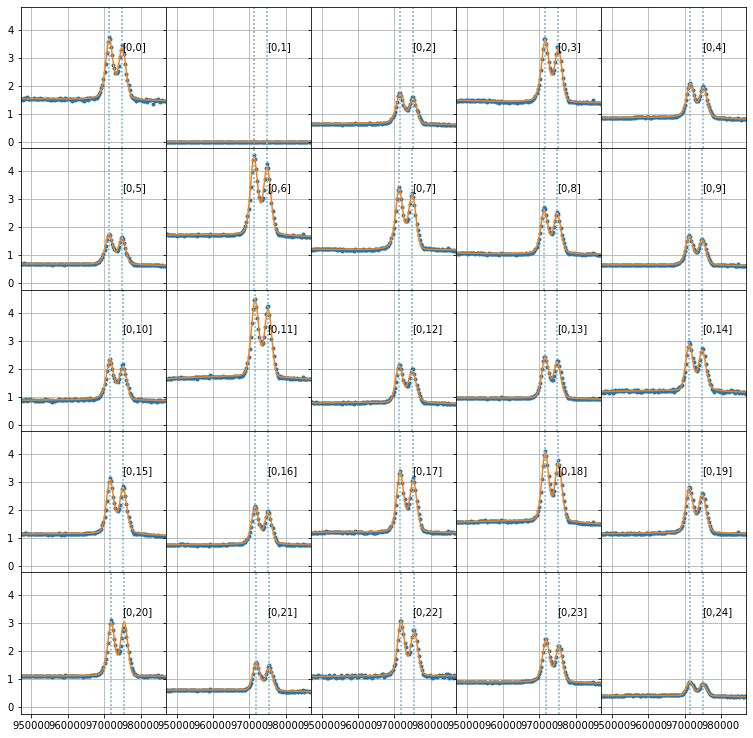

Spexel  1


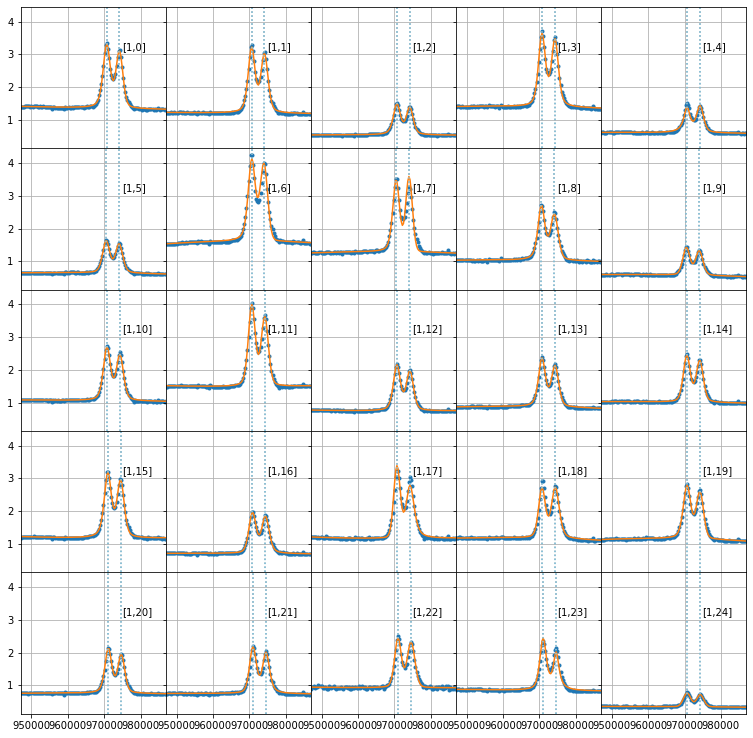

Spexel  2


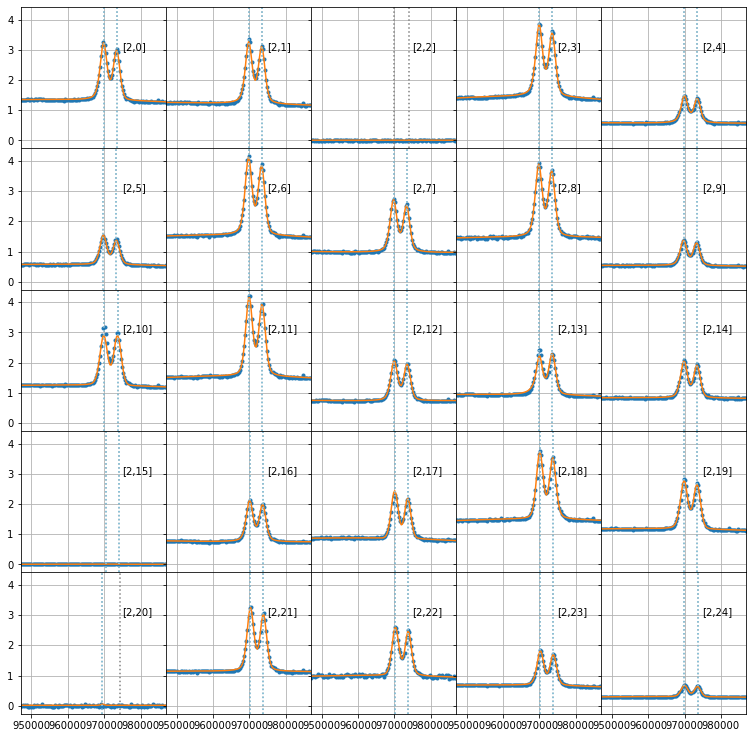

Spexel  3


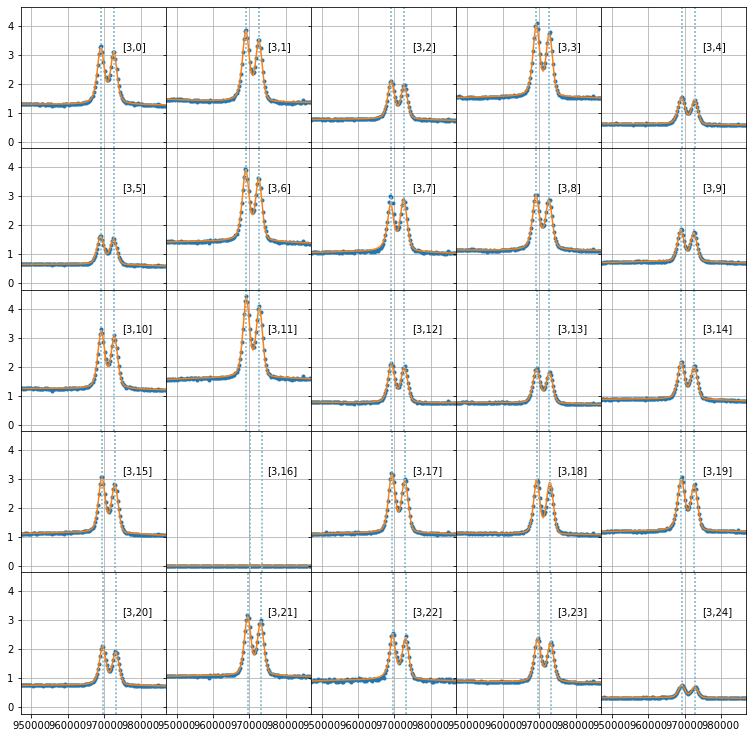

Spexel  4


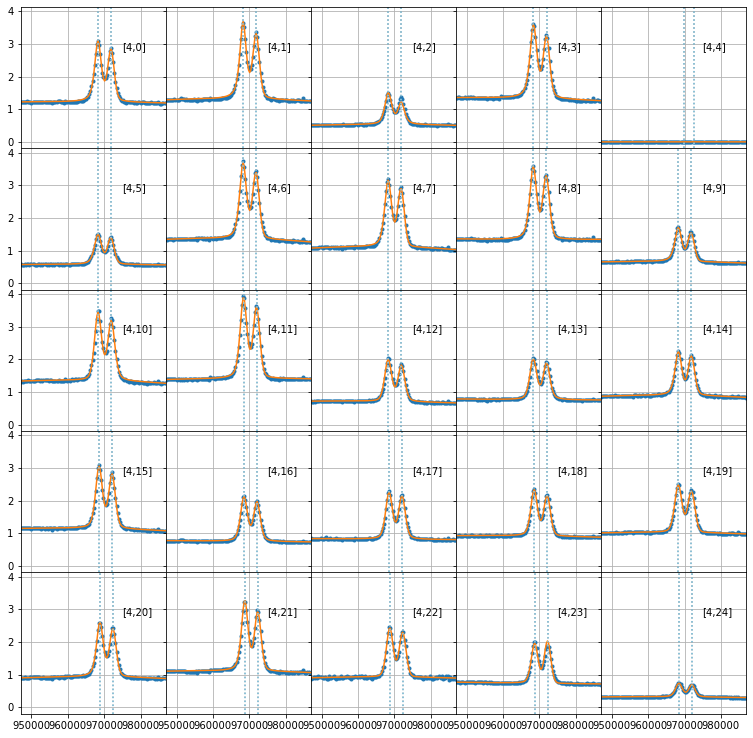

Spexel  5


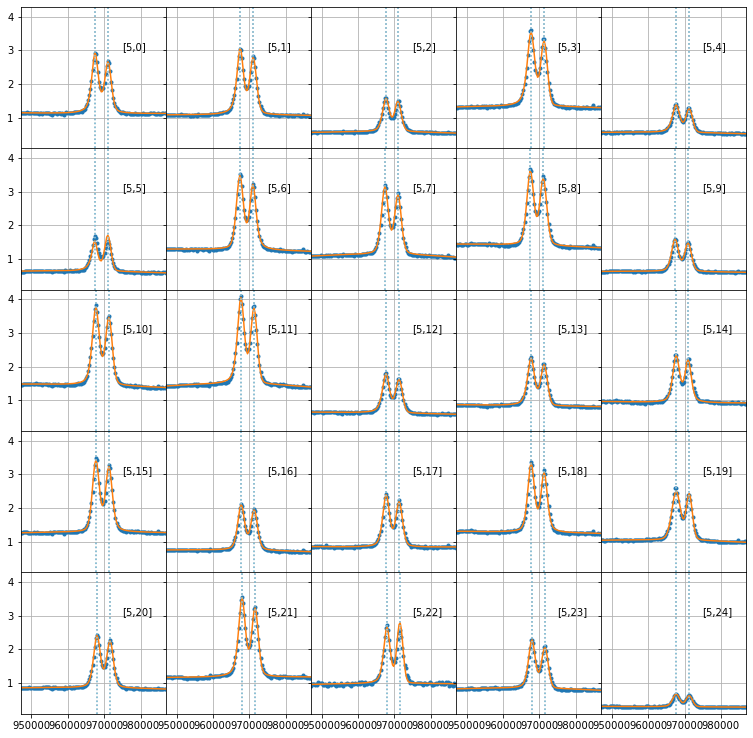

Spexel  6


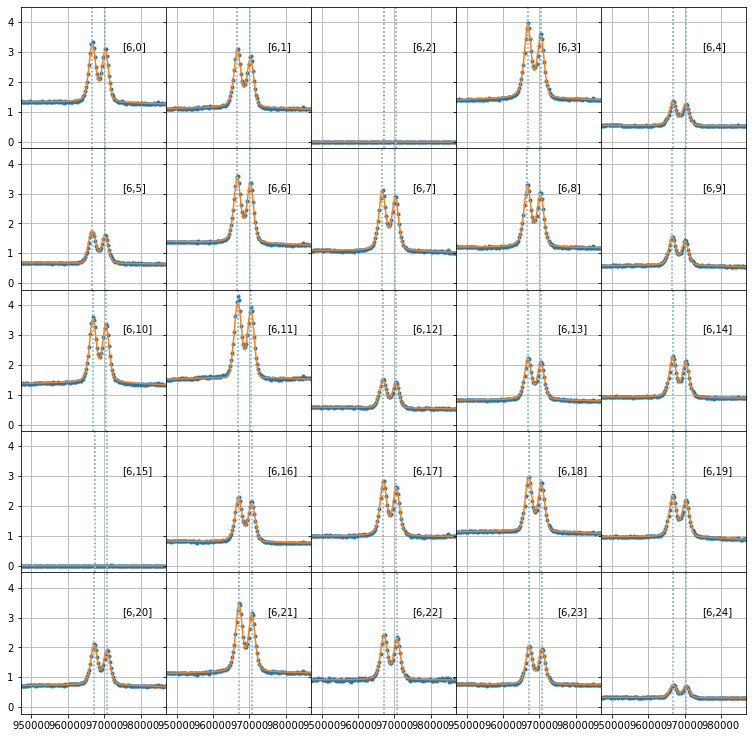

Spexel  7


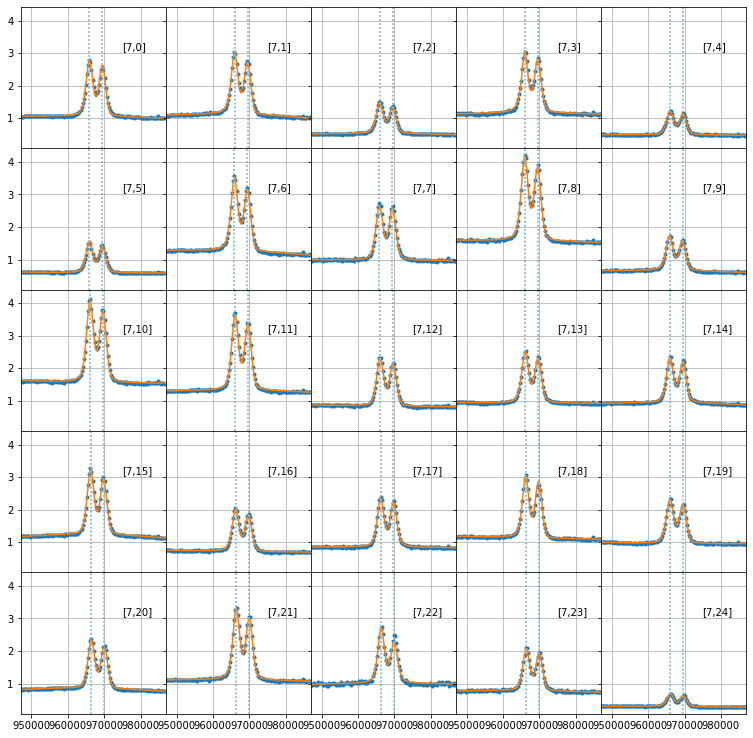

Spexel  8


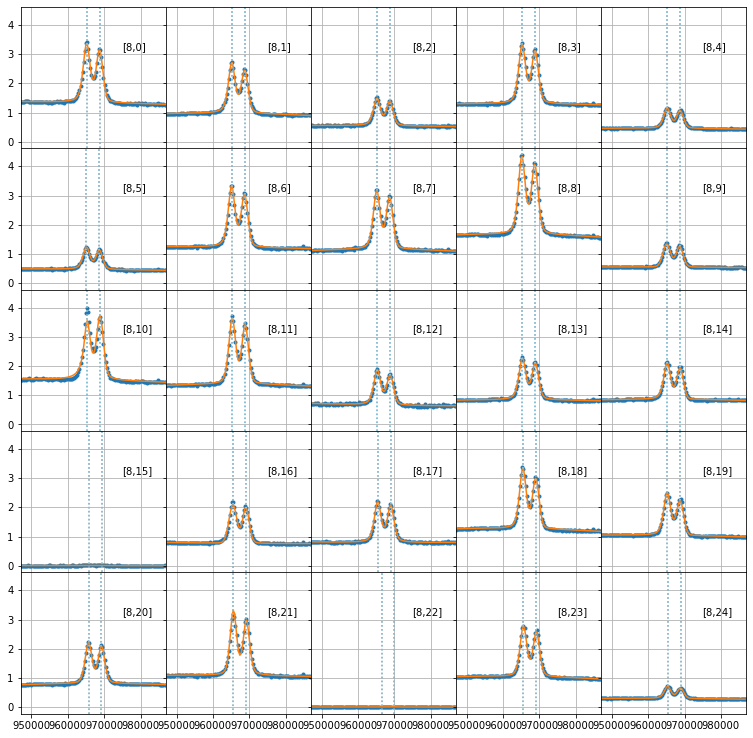

Spexel  9


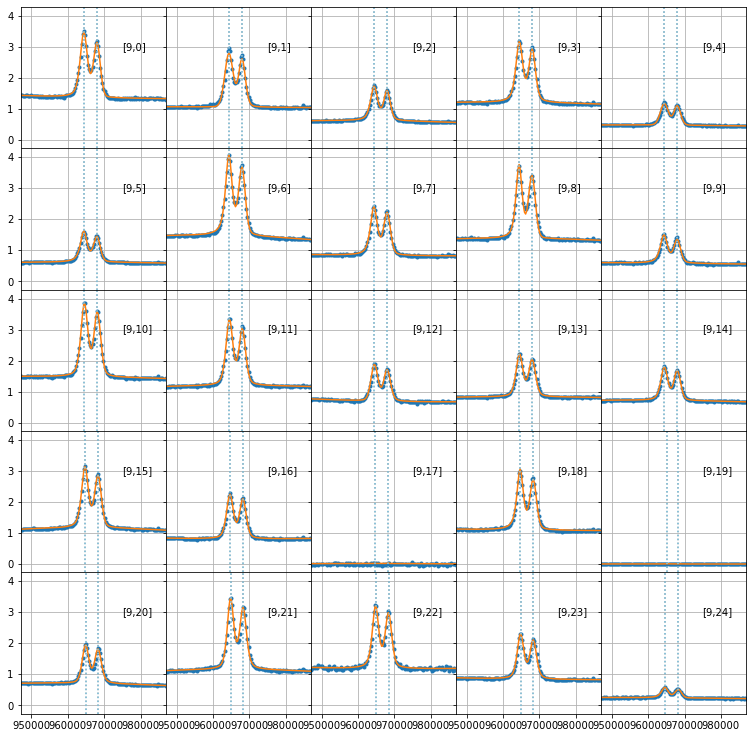

Spexel  10


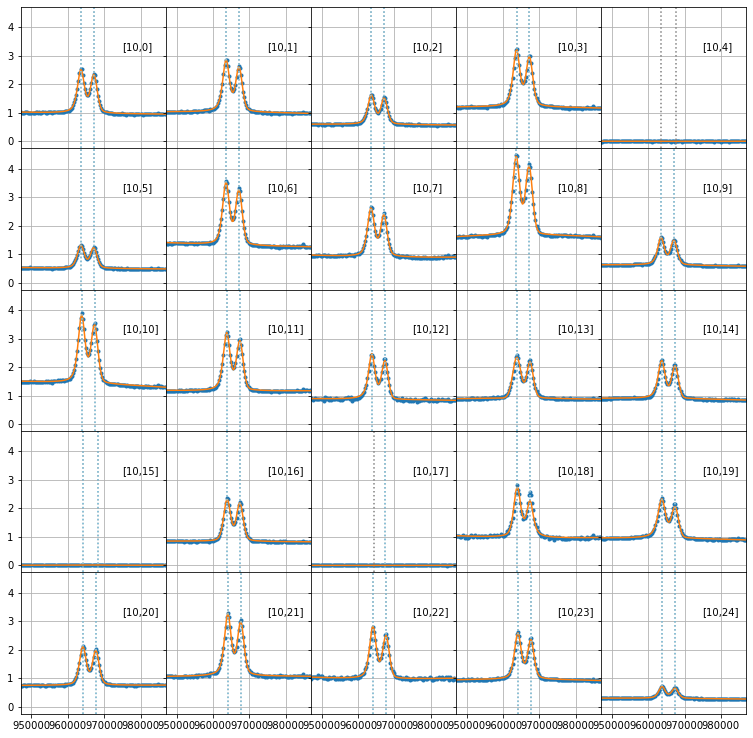

Spexel  11


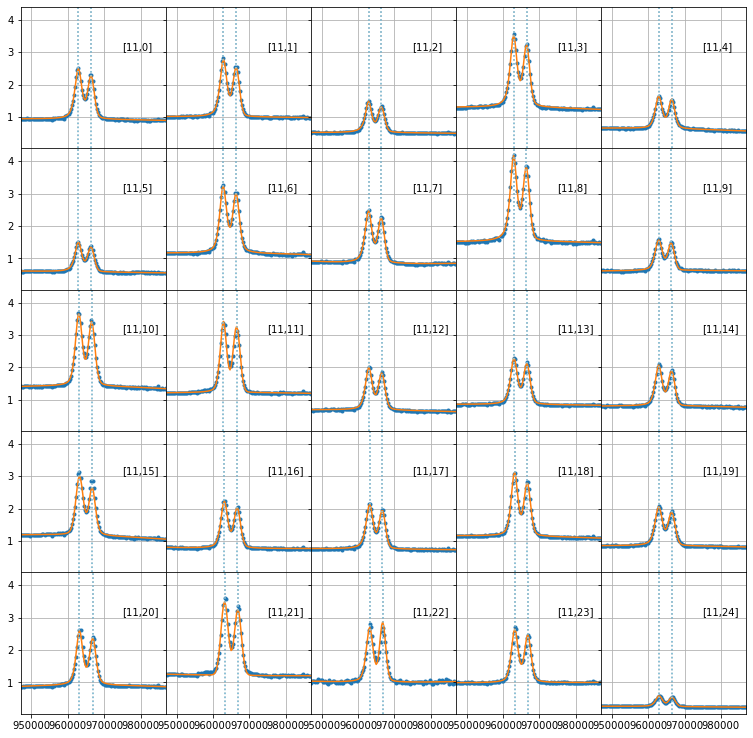

Spexel  12


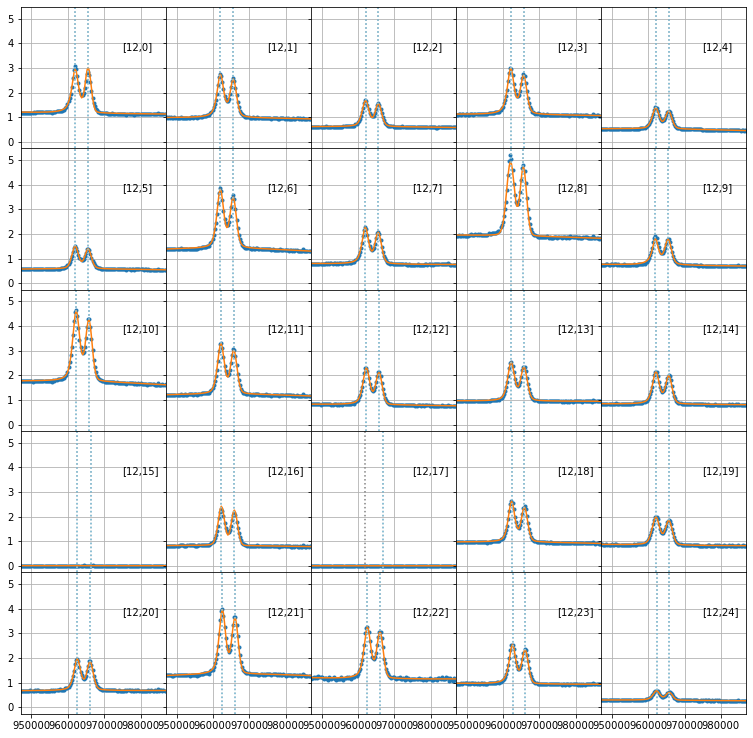

Spexel  13


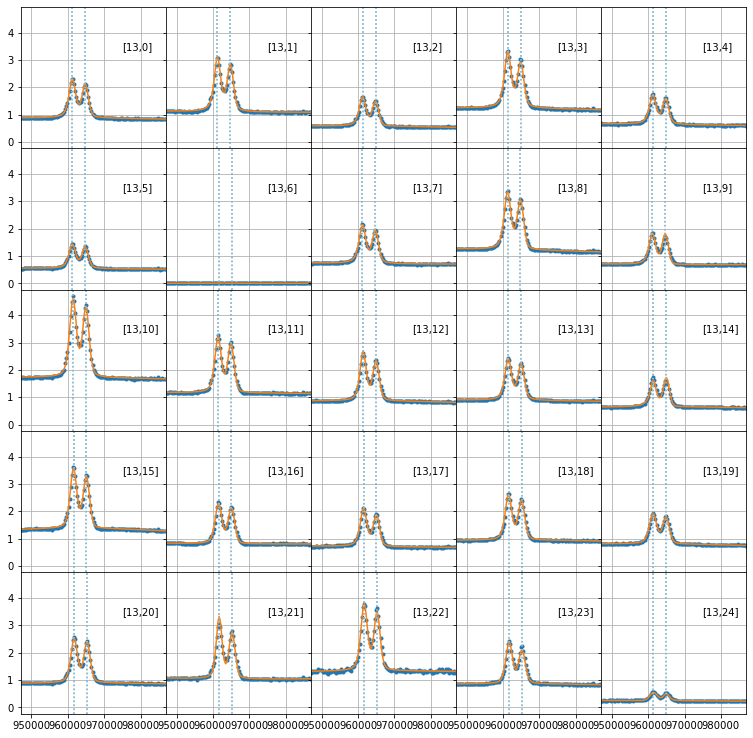

Spexel  14


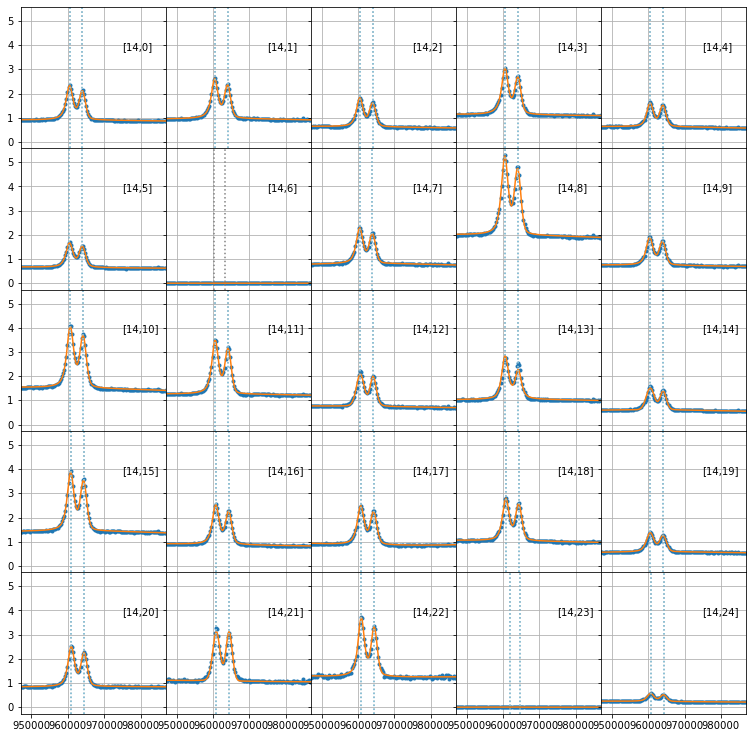

Spexel  15


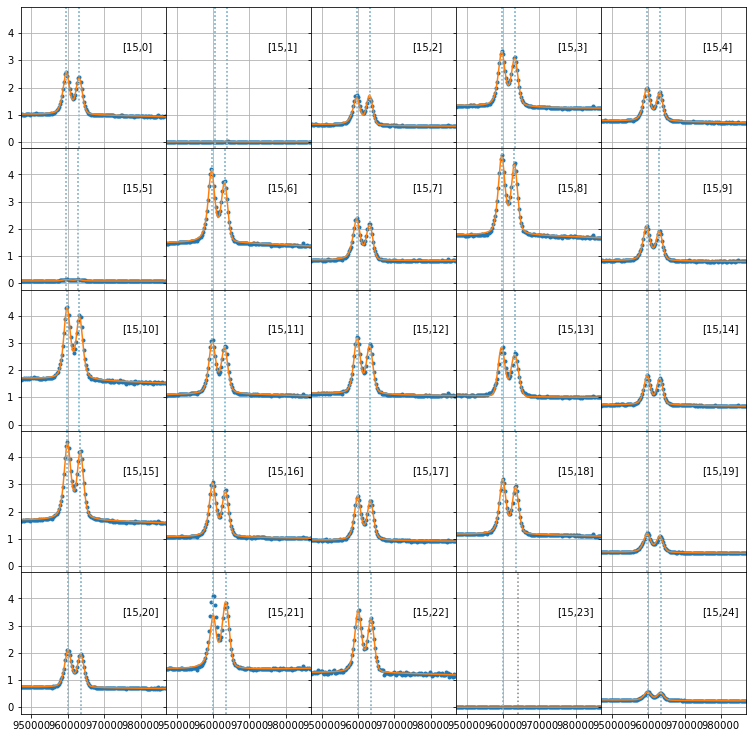

End of plots.


In [1]:
%matplotlib inline
from fifipy.wavecal import fitData
rootdir = '../202002WaveCalData/Reduced/' 
infile = rootdir + 'R1_105_GC33_0.fits'
fitData(infile, plot=True)

In [1]:
# Fit of all the data
from fifipy.wavecal import fitData
from glob import glob as gb
rootdir = '../202002WaveCalData/Reduced/'
infiles = gb(rootdir+'*.fits')
nfiles = len(infiles)
for k, infile in enumerate(infiles):
    print(str(nfiles-k)+' '+infile+' ', end='')
    fitData(infile, plot=False)
    print('')

53 ../202002WaveCalData/Reduced/B2_105_GC05_0.fits BLUE 2   ................
52 ../202002WaveCalData/Reduced/B2_105_GC04_0.fits BLUE 2   ................
51 ../202002WaveCalData/Reduced/B1_105_GC18_0.fits BLUE 1   ................
50 ../202002WaveCalData/Reduced/R1_105_GC06_0.fits RED 1   ................
49 ../202002WaveCalData/Reduced/B1_105_GC33_0.fits BLUE 1   ................
48 ../202002WaveCalData/Reduced/B2_105_GC01_0.fits BLUE 2   ................
47 ../202002WaveCalData/Reduced/R1_105_GC18_0.fits RED 1   ................
46 ../202002WaveCalData/Reduced/B2_105_GC03_0.fits BLUE 2   ................
45 ../202002WaveCalData/Reduced/R1_130_GC14_0.fits RED 1   ................
44 ../202002WaveCalData/Reduced/B2_130_GC25_0.fits BLUE 2   ................
43 ../202002WaveCalData/Reduced/B2_130_GC26_0.fits BLUE 2   ................
42 ../202002WaveCalData/Reduced/B2_130_GC23_0.fits BLUE 2   ................
41 ../202002WaveCalData/Reduced/B2_105_GC08_1.fits BLUE 2   ................
40

In [55]:
# How to run it without multi-threading  
from fifipy.wavecal import fitData
rootdir = '../202002WaveCalData/Reduced/BAD/'
fitData(rootdir+'B1_105_GC19_0.fits', plot=False)#, multi=False)

BLUE 1   ................

In [68]:
# Select ...
from fifipy.wavecal import fitData
from glob import glob as gb
rootdir = '../202002WaveCalData/Reduced/'
infiles = gb(rootdir+'B1_1*.fits')
nfiles = len(infiles)
for k, infile in enumerate(infiles):
    print(str(nfiles-k)+' '+infile+' ', end='')
    fitData(infile, plot=False)
    print('')

13 ../202002WaveCalData/Reduced/B1_105_GC18_0.fits BLUE 1   ................
12 ../202002WaveCalData/Reduced/B1_105_GC33_0.fits BLUE 1   ................
11 ../202002WaveCalData/Reduced/B1_105_GC32_0.fits BLUE 1   ................
10 ../202002WaveCalData/Reduced/B1_130_GC12_0.fits BLUE 1   ................
9 ../202002WaveCalData/Reduced/B1_130_GC11_0.fits BLUE 1   ................
8 ../202002WaveCalData/Reduced/B1_130_GC14_0.fits BLUE 1   ................
7 ../202002WaveCalData/Reduced/B1_130_GC10_0.fits BLUE 1   ................
6 ../202002WaveCalData/Reduced/B1_105_GC30_0.fits BLUE 1   ................
5 ../202002WaveCalData/Reduced/B1_130_GC13_0.fits BLUE 1   ................
4 ../202002WaveCalData/Reduced/B1_130_GC16_0.fits BLUE 1   ................
3 ../202002WaveCalData/Reduced/B1_105_GC31_0.fits BLUE 1   ................
2 ../202002WaveCalData/Reduced/B1_130_GC16_1.fits BLUE 1   ................
1 ../202002WaveCalData/Reduced/B1_130_GC15_0.fits BLUE 1   ................


## Open files and estimate parameters

Once lines have been fitted in each reduced file, we can select some files and run the fit for each configuration channel/order and spaxel.

In [79]:
# Select files
from fifipy.wavecal import selectFiles

rootdir = '../202002WaveCalData/Reduced/'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,'B','2','105')

Number of files  15


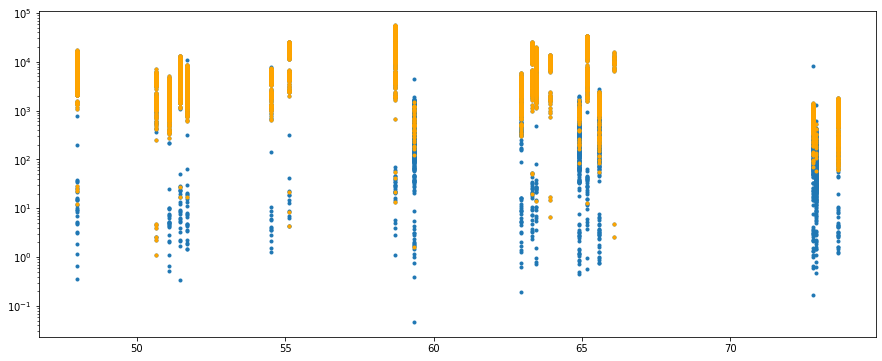

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(15,6))
plt.plot(wavepos, gratamp,'.')
idx = gerrpos < 100
plt.plot(wavepos[idx], gratamp[idx],'.',color='orange')
plt.yscale('log')
plt.show()

In [81]:
# Fit for single spaxels
from fifipy.wavecal import computeWavCal
channel = 'B'
order = 2
idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order
                    # R 105
                    #,fixPS= 0.0005854566772784549
                    #,fixQS= 1.66063938911983e-06
                    #,fixQOFF= 6.0118704678350845
                    #,fixgamma= 0.016892013199920057
                    # R 130
                    #,fixPS= 0.0005860099335576453
                    #,fixQS= 1.5336269718690204e-06
                    #,fixQOFF= 5.583645029724298
                    #,fixgamma= 0.01661635997140211
                    # B1
                    #,fixPS= 0.0005561718162130785
                    #,fixQS= 1.008625116883335e-05
                    #,fixQOFF= 6.865403273525447
                    #,fixgamma= 0.009508524705874957
                    # B2
                    ,fixPS= 0.0005634719856370688
                    ,fixQS= 6.578342750007408e-06
                    ,fixQOFF= 6.425406286154825
                    ,fixgamma= 0.009153526150450678
                   )

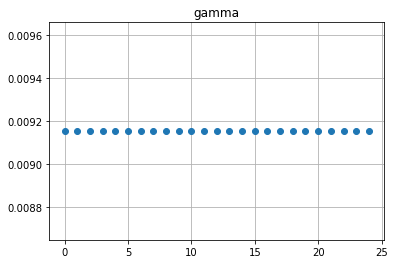

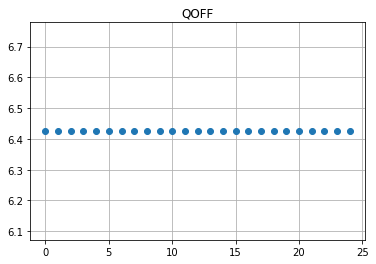

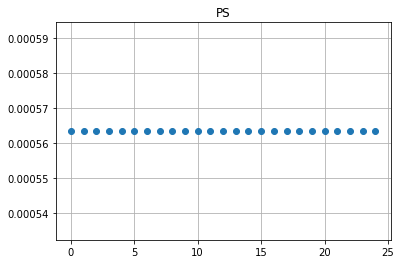

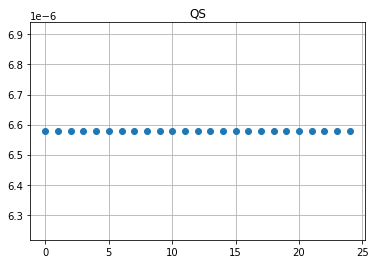

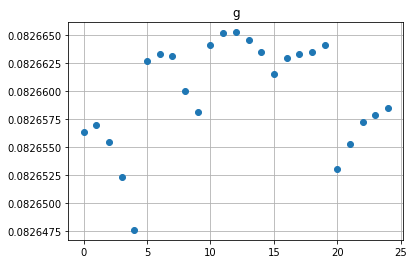

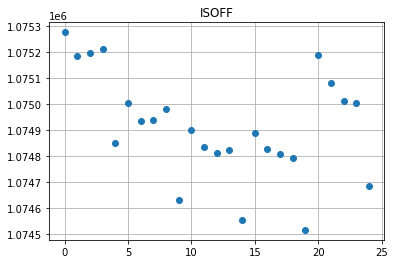

,fixPS= 0.0005634719856370688
,fixQS= 6.578342750007408e-06
,fixQOFF= 6.425406286154825
,fixgamma= 0.009153526150450678


In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
g,gamma,QOFF, PS,QS, ISOFF = out
for v, title in zip([gamma, QOFF, PS, QS, g, ISOFF],['gamma','QOFF', 'PS', 'QS','g','ISOFF']):
    plt.plot(v,'o')
    plt.title(title)
    plt.grid()
    plt.show()
    
goodpixels = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18,20,21,22,23]

print(',fixPS=', np.nanmedian(PS[goodpixels]))
print(',fixQS=', np.nanmedian(QS[goodpixels]))
print(',fixQOFF=', np.nanmedian(QOFF[goodpixels]))
print(',fixgamma=', np.nanmedian(gamma[goodpixels]))

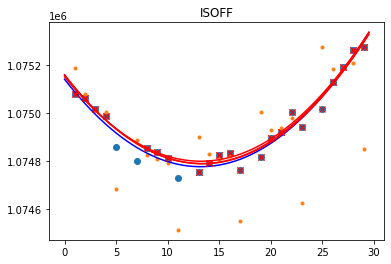

ai =  2.017204713647851
bi =  -53.25995294388057
ci =  1075152.2139129096


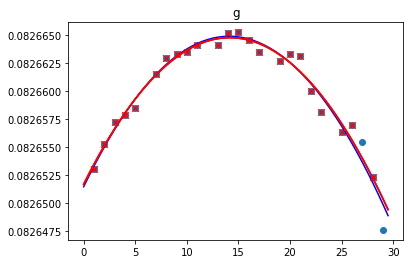

g0 =  0.08266475094427317
NP =  14.161680914964213
a  =  796.2739053522718


In [83]:
# Fit of g and ISOFF
from fifipy.wavecal import fitISOFF,fitg
ai,bi,ci = fitISOFF(ISOFF, channel)
g0,NP,a  = fitg(g)

In [13]:
# Median ISOFF deviations

red = [  -8.20328893,    6.35303121,   15.15850744,   47.13169968,   53.19085482,
  -87.37379178,  -58.5477522,   -56.42734186,  -30.89791712,  -77.46628125,
   38.68317738,   53.59124765,   61.66651196,   82.1684345,   -38.09540496,
   -6.24125859,   35.99663217 ,  43.09176554,   72.24014254 ,-131.23373814,
  -53.15045713,  -28.70681729 ,  -4.15794671,   20.91594107, -251.65783885]

blue = [-258.04881172,  -53.44382751 ,   0.9087238 ,   50.50108697 , 425.55698219,
 -185.70929074,  -33.69497542 , -18.19496335,   26.4389202,   316.63904619,
 -143.17299604,  -39.18047949 ,  15.21162265 ,   9.6569573 ,  213.22748723,
  -86.86089338 ,  26.81683061 ,  32.44337077 ,  24.67524844 , 216.62538125,
 -106.91685921 , -16.26743503 ,   6.44892054,  -13.76693703 , 172.77801033]

# Results and Check 

Let's check now if all the lines are recovered within 10% of resolution.
To do this, we have to use the coefficients to convert grating positions into wavelengths and then
check if the difference between expected and real wavelengths are inside the 10% resolution.

$R = \lambda / \Delta\lambda$

So, we are checking the errors in the center:

$ Ratio = \sigma_\lambda / \Delta\lambda = (1 - \lambda_{est}/\lambda) R$

where the error on $\lambda$ is defined as:

$\sigma_\lambda = \lambda - \lambda_{est}$

# R 130

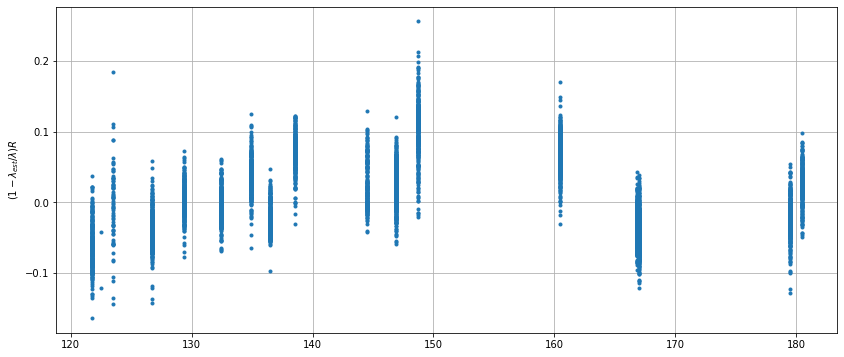

In [92]:
from fifipy.wavecal import computeWavelength
from fifipy.spectra import getResolution
g0 =  0.11714899927859786
NP =  14.337156810778048
a  =  424.5613779247588

ai =  6.305658911271944
bi =  -160.04064911600804
ci =  1151305.2758572241
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
ISOFF = ai*slitPos**2 + bi*slitPos + ci - red 
PS= 0.0005854566772784549
QS= 1.66063938911983e-06
QOFF= 6.0118704678350845
gamma= 0.016892013199920057
ISF=1
coeffs = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

w_est = []
dw_est = []
resol = []
idx = (gratamp > 100) & (gerrpos < 100) & (waveok ==1)
for pix, mo, gp, wp in zip(pixel[idx], modules[idx], gratpos[idx], wavepos[idx]):
    w,dw = computeWavelength(pix, mo, order, coeffs, gp)
    resol.append(getResolution('R', wp))
    w_est.append(w)
    dw_est.append(dw)
w_est = np.array(w_est)
R = np.array(resol)


fig,ax = plt.subplots(figsize=(14,6))
plt.plot(wavepos[idx],(w_est-wavepos[idx])/(wavepos[idx]/R),'.')
plt.ylabel ( '$(1 - \lambda_{est}/\lambda )R$')
plt.grid()
plt.show()


w_est_dario = w_est.copy()

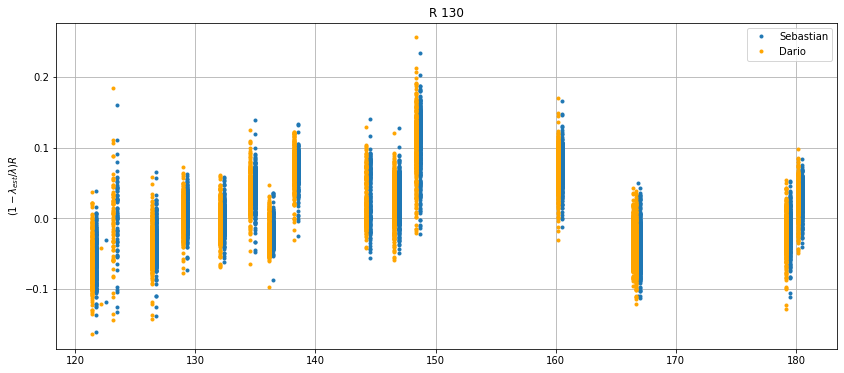

In [93]:
## Sebastian solution
#gamma R105, R130, B1, B2 [0.01672   0.01672   0.0089008 0.0089008]
#PS    R105, R130, B1, B2 [0.00058725 0.00058661 0.00055135 0.00055707]
#QOFF  R105, R130, B1, B2 [6.43132815 6.41279394 6.76554683 6.47578507]
#QS    R105, R130, B1, B2 [1.63524966e-06 1.75422448e-06 1.09427961e-05 7.62265104e-06]
#g0    R105, R130, B1, B2 [0.11715587 0.11714915 0.08265614 0.08266067]
#NP    R105, R130, B1, B2 [14.2983228  14.38387888 13.59708573 14.04656317]
#a     R105, R130, B1, B2 [424.39436177 422.32884727 791.94675182 752.17373279]

ISF = 1
gamma = 0.01672  
PS = 0.00058661
QOFF = 6.41279394 
QS = 1.75422448e-06
g0 = 0.11714915
NP = 14.38387888
a = 422.32884727
ISOFF = np.array([1151274.01655812, 1151413.52482694, 1151580.36241319, 1151745.36034119,
  1151940.28267447, 1150642.13624556, 1150688.20751768 ,1150784.6799275,
  1150878.2360058 , 1151033.36012832, 1150265.15404007, 1150250.91196343,
  1150271.53297142 ,1150291.47775353, 1150412.03173064, 1150518.90877927,
  1150405.07186052, 1150347.86982055, 1150283.57632537, 1150394.40893302,
  1151228.51773798, 1151065.93192938 ,1150917.57439047 ,1150778.65308793,
  1150864.67540508])

coeffs = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

mode = 'R'
w_est = []
dw_est = []
resol = []
idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1)
for pix, mo, gp, wp in zip(pixel[idx], modules[idx], gratpos[idx], wavepos[idx]):
    w,dw = computeWavelength(pix, mo, order, coeffs, gp)
    resol.append(getResolution('R', wp))
    w_est.append(w)
    dw_est.append(dw)

w_est = np.array(w_est)
R = np.array(resol)
fig,ax = plt.subplots(figsize=(14,6))
plt.plot(wavepos[idx],(w_est-wavepos[idx])/(wavepos[idx]/R),'.',label='Sebastian')
plt.plot(wavepos[idx]-0.35,(w_est_dario-wavepos[idx])/(wavepos[idx]/R),'.',color='orange',label='Dario')
plt.ylabel ( '$(1 - \lambda_{est}/\lambda )R$')
plt.legend()
plt.title('R 130')
plt.grid()
plt.show()

## R 105

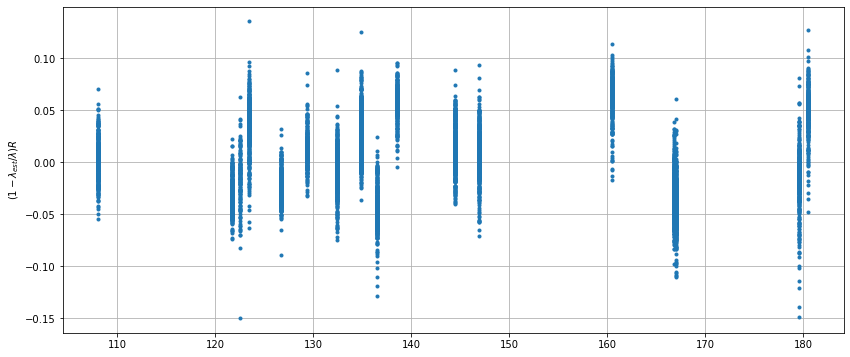

In [102]:
from fifipy.wavecal import computeWavelength
from fifipy.spectra import getResolution
ai =  6.486090930440171
bi =  -164.74305244625415
ci =  1150986.3117378314
ISOFF = ai*slitPos**2 + bi*slitPos + ci - red 

g0 =  0.11716050349023992
NP =  14.294029297460671
a  =  422.2854647244656
PS= 0.0005869065416399757
QS= 1.4476062090635026e-06
QOFF= 5.807228135118763
gamma= 0.01672

ISF=1
coeffs = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

w_est = []
dw_est = []
resol = []
idx = (gratamp > 100) & (gerrpos < 100)  & (waveok ==1)
for pix, mo, gp, wp in zip(pixel[idx], modules[idx], gratpos[idx], wavepos[idx]):
    w,dw = computeWavelength(pix, mo, order, coeffs, gp)
    resol.append(getResolution('R', wp))
    w_est.append(w)
    dw_est.append(dw)
w_est = np.array(w_est)
R = np.array(resol)


fig,ax = plt.subplots(figsize=(14,6))
plt.plot(wavepos[idx],(w_est-wavepos[idx])/(wavepos[idx]/R),'.')
plt.ylabel ( '$(1 - \lambda_{est}/\lambda )R$')
plt.grid()
plt.show()


w_est_dario = w_est.copy()

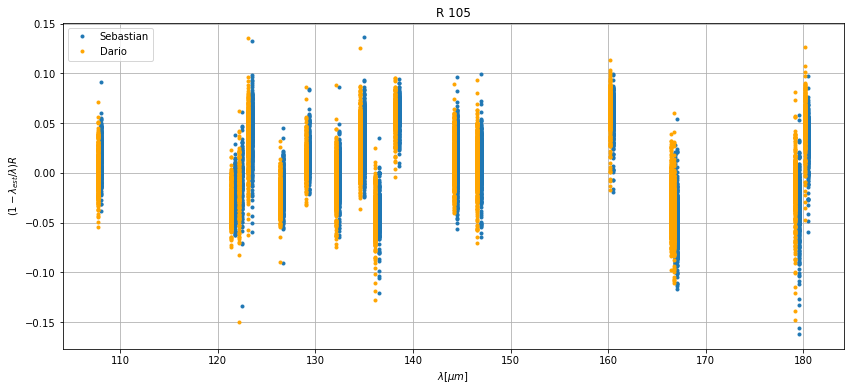

[] [] [] []


In [106]:
# Sebastian values
#gamma R105, R130, B1, B2 [0.01672   0.01672   0.0089008 0.0089008]
#PS    R105, R130, B1, B2 [0.00058725 0.00058661 0.00055135 0.00055707]
#QOFF  R105, R130, B1, B2 [6.43132815 6.41279394 6.76554683 6.47578507]
#QS    R105, R130, B1, B2 [1.63524966e-06 1.75422448e-06 1.09427961e-05 7.62265104e-06]
#g0    R105, R130, B1, B2 [0.11715587 0.11714915 0.08265614 0.08266067]
#NP    R105, R130, B1, B2 [14.2983228  14.38387888 13.59708573 14.04656317]
#a     R105, R130, B1, B2 [424.39436177 422.32884727 791.94675182 752.17373279]

ISF = 1
gamma = 0.01672  
PS = 0.00058725 
QOFF = 6.43132815
QS = 1.63524966e-06
g0 = 0.11715587
NP = 14.2983228
a = 424.39436177
ISOFF = np.array([
          1151018.85546153, 
         1151165.48553046 ,
         1151335.90476101, 
         1151491.56907062, 
         1151686.60289121, 
         1150378.70474825 ,
         1150438.61310697, 
         1150534.99456112,
         1150621.41361534, 
         1150787.16709688, 
         1149999.84125093 ,
         1149994.5304278,
         1150010.25267645 ,
         1150024.40456741, 
         1150175.60376506, 
         1150257.12420037,
         1150145.50770402, 
         1150085.02465769, 
         1150011.79997599, 
         1150156.69211302,
         1150959.55003475, 
         1150802.38820545, 
         1150648.80899207, 
         1150502.84530206,
         1150634.50300434])
coeffs = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

mode = 'R'
w_est = []
dw_est = []
resol = []
idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1)
for pix, mo, gp, wp in zip(pixel[idx], modules[idx], gratpos[idx], wavepos[idx]):
    w,dw = computeWavelength(pix, mo, order, coeffs, gp)
    resol.append(getResolution('R', wp))
    w_est.append(w)
    dw_est.append(dw)

w_est = np.array(w_est)
R = np.array(resol)
fig,ax = plt.subplots(figsize=(14,6))
plt.plot(wavepos[idx],(w_est-wavepos[idx])/(wavepos[idx]/R),'.',label='Sebastian')
plt.plot(wavepos[idx]-0.35,(w_est_dario-wavepos[idx])/(wavepos[idx]/R),'.',color='orange',label='Dario')
plt.ylabel ( '$(1 - \lambda_{est}/\lambda )R$')
plt.legend()
plt.grid()
plt.title('R 105')
plt.xlabel('$\lambda [\mu m]$')
plt.show()

pix = pixel[idx]
mod = modules[idx]
nfi = nfile[idx]
gpos = gratpos[idx]
ratio = (w_est_dario-wavepos[idx])/(wavepos[idx]/R)
index = ratio < -1
infiles = np.array(infiles)
print(pix[index], mod[index], infiles[nfi[index]], gpos[index])

# B 1

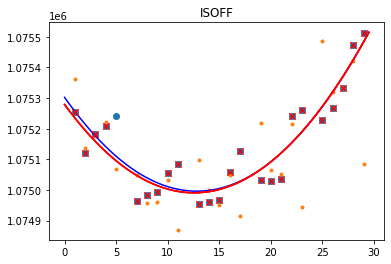

ai =  1.82785606516242
bi =  -45.924286570808164
ci =  1075279.0934166687


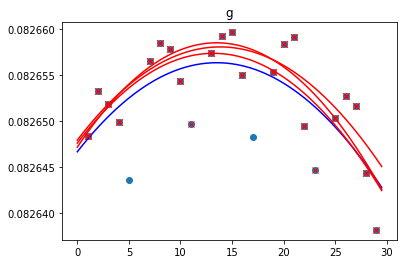

g0 =  0.08265802598616162
NP =  13.834697691823667
a  =  883.5186011107611


In [76]:
# Fit of g and ISOFF
from fifipy.wavecal import fitISOFF,fitg
ai,bi,ci = fitISOFF(ISOFF, channel)
g0,NP,a  = fitg(g)

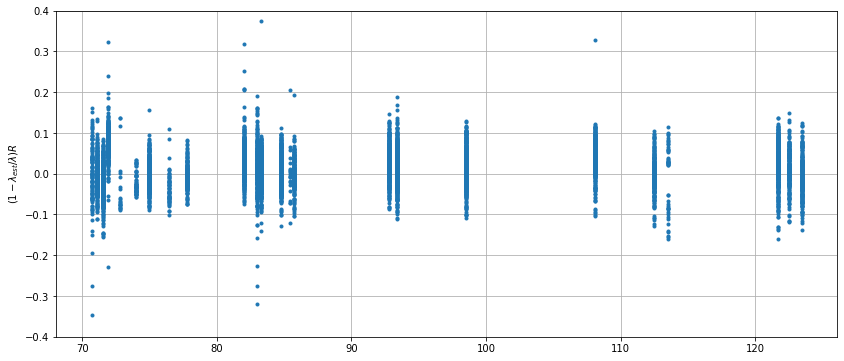

In [77]:
from fifipy.wavecal import computeWavelength
from fifipy.spectra import getResolution
g0 =  0.08265802598616162
NP =  13.834697691823667
a  =  883.5186011107611


ai =  1.82785606516242
bi =  -45.924286570808164
ci =  1075279.0934166687
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
ISOFF = ai*slitPos**2 + bi*slitPos + ci - blue
PS= 0.0005561718162130785
QS= 1.008625116883335e-05
QOFF= 6.865403273525447
gamma= 0.009508524705874957


ISF=1
coeffs = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

w_est = []
dw_est = []
resol = []
idx = (gratamp > 100) & (gerrpos < 100) & (waveok ==1)
for pix, mo, gp, wp in zip(pixel[idx], modules[idx], gratpos[idx], wavepos[idx]):
    w,dw = computeWavelength(pix, mo, order, coeffs, gp)
    resol.append(getResolution('B1', wp))
    w_est.append(w)
    dw_est.append(dw)
w_est = np.array(w_est)
R = np.array(resol)


fig,ax = plt.subplots(figsize=(14,6))
plt.plot(wavepos[idx],(w_est-wavepos[idx])/(wavepos[idx]/R),'.')
plt.ylabel ( '$(1 - \lambda_{est}/\lambda )R$')
plt.grid()
plt.ylim(-0.4,0.4)
plt.show()


w_est_dario = w_est.copy()

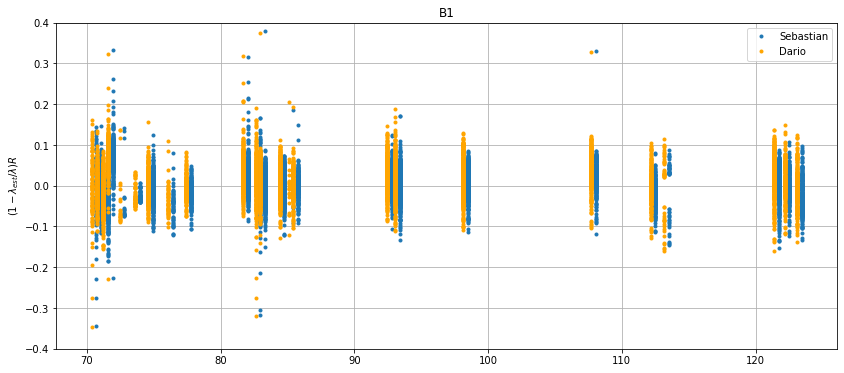

In [78]:
# Comparison with Sebastian
# Sebastian values
#gamma R105, R130, B1, B2 [0.01672   0.01672   0.0089008 0.0089008]
#PS    R105, R130, B1, B2 [0.00058725 0.00058661 0.00055135 0.00055707]
#QOFF  R105, R130, B1, B2 [6.43132815 6.41279394 6.76554683 6.47578507]
#QS    R105, R130, B1, B2 [1.63524966e-06 1.75422448e-06 1.09427961e-05 7.62265104e-06]
#g0    R105, R130, B1, B2 [0.11715587 0.11714915 0.08265614 0.08266067]
#NP    R105, R130, B1, B2 [14.2983228  14.38387888 13.59708573 14.04656317]
#a     R105, R130, B1, B2 [424.39436177 422.32884727 791.94675182 752.17373279]

ISF = 1
gamma = 0.0089008 
PS = 0.00055135
QOFF =  6.76554683
QS = 1.09427961e-05
g0 = 0.08265614
NP = 13.59708573
a = 791.94675182
ISOFF = np.array([
  1075508.15498211, 1075439.45825896 ,1075456.51375625 ,1075438.97769326,
  1075028.22682952, 1075202.58051734 ,1075137.65816826 ,1075171.7074569,
  1075143.73647084, 1074805.32460823, 1075087.23825569 ,1075028.55016792,
  1074997.01262641, 1074998.71167802 ,1074741.32648326 ,1075085.28833033,
  1075019.3883817 , 1074998.73707614 ,1074981.02760168 ,1074720.72808663,
  1075373.35722819, 1075265.48346147 ,1075207.10087908 ,1075178.08892856,
  1074887.94149425])
    
coeffs = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

w_est = []
dw_est = []
resol = []
idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1)
for pix, mo, gp, wp in zip(pixel[idx], modules[idx], gratpos[idx], wavepos[idx]):
    w,dw = computeWavelength(pix, mo, order, coeffs, gp)
    resol.append(getResolution('B1', wp))
    w_est.append(w)
    dw_est.append(dw)

w_est = np.array(w_est)
R = np.array(resol)
fig,ax = plt.subplots(figsize=(14,6))
plt.plot(wavepos[idx],(w_est-wavepos[idx])/(wavepos[idx]/R),'.',label='Sebastian')
plt.plot(wavepos[idx]-0.35,(w_est_dario-wavepos[idx])/(wavepos[idx]/R),'.',color='orange',label='Dario')
plt.ylabel ( '$(1 - \lambda_{est}/\lambda )R$')
plt.legend()
plt.grid()
plt.title('B1')
plt.ylim(-0.4,0.4)
plt.show()


# B 2

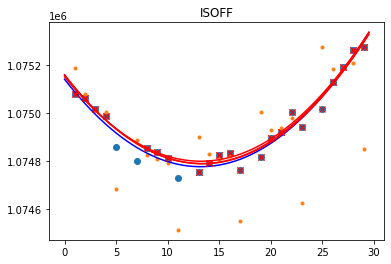

ai =  2.017204713647851
bi =  -53.25995294388057
ci =  1075152.2139129096


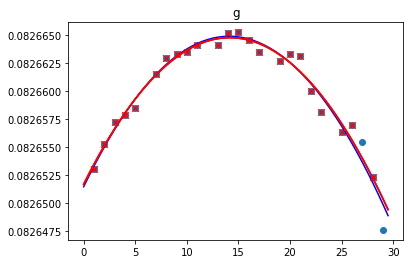

g0 =  0.08266475094427317
NP =  14.161680914964213
a  =  796.2739053522718


In [84]:
# Fit of g and ISOFF
from fifipy.wavecal import fitISOFF,fitg
ai,bi,ci = fitISOFF(ISOFF, channel)
g0,NP,a  = fitg(g)

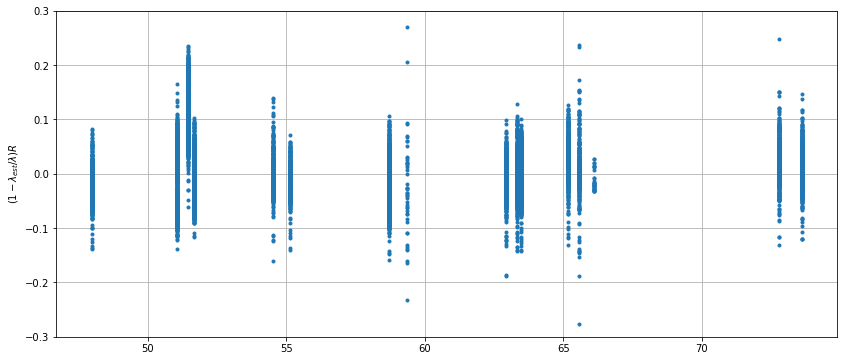

In [85]:
from fifipy.wavecal import computeWavelength
from fifipy.spectra import getResolution

g0 =  0.08266475094427317
NP =  14.161680914964213
a  =  796.2739053522718

ai =  2.017204713647851
bi =  -53.25995294388057
ci =  1075152.2139129096

module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
ISOFF = ai*slitPos**2 + bi*slitPos + ci - blue

PS= 0.0005634719856370688
QS= 6.578342750007408e-06
QOFF= 6.425406286154825
gamma= 0.009153526150450678

ISF=1
coeffs = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

w_est = []
dw_est = []
resol = []
order = 2
idx = (gratamp > 100) & (gerrpos < 100) & (waveok ==1)
for pix, mo, gp, wp in zip(pixel[idx], modules[idx], gratpos[idx], wavepos[idx]):
    w,dw = computeWavelength(pix, mo, order, coeffs, gp)
    resol.append(getResolution('B2', wp))
    w_est.append(w)
    dw_est.append(dw)
w_est = np.array(w_est)
R = np.array(resol)


fig,ax = plt.subplots(figsize=(14,6))
plt.plot(wavepos[idx],(w_est-wavepos[idx])/(wavepos[idx]/R),'.')
plt.ylabel ( '$(1 - \lambda_{est}/\lambda )R$')
plt.grid()
plt.ylim(-0.3,0.3)
plt.show()


w_est_dario = w_est.copy()

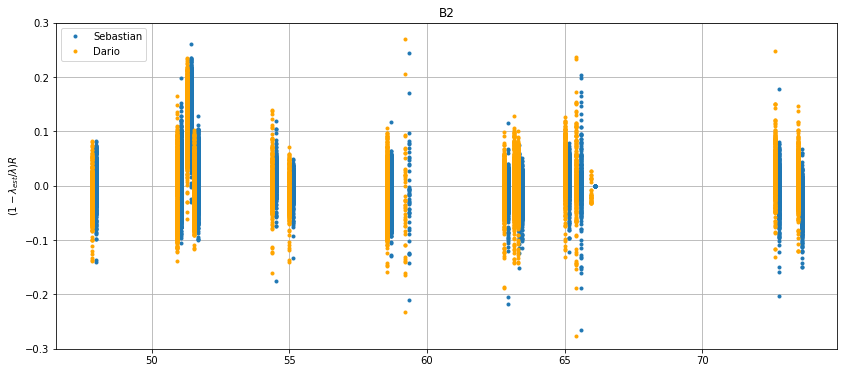

In [86]:
# Comparison with Sebastian
# Sebastian values
#gamma R105, R130, B1, B2 [0.01672   0.01672   0.0089008 0.0089008]
#PS    R105, R130, B1, B2 [0.00058725 0.00058661 0.00055135 0.00055707]
#QOFF  R105, R130, B1, B2 [6.43132815 6.41279394 6.76554683 6.47578507]
#QS    R105, R130, B1, B2 [1.63524966e-06 1.75422448e-06 1.09427961e-05 7.62265104e-06]
#g0    R105, R130, B1, B2 [0.11715587 0.11714915 0.08265614 0.08266067]
#NP    R105, R130, B1, B2 [14.2983228  14.38387888 13.59708573 14.04656317]
#a     R105, R130, B1, B2 [424.39436177 422.32884727 791.94675182 752.17373279]

ISF = 1
gamma = 0.0089008 
PS = 0.00055707
QOFF =   6.47578507
QS = 7.62265104e-06
g0 = 0.08266067
NP = 14.04656317
a = 752.17373279
ISOFF = np.array([
  1075435.76333023, 1075423.84875098, 1075438.46327257, 1075419.02759303,
  1074952.67440319, 1075142.79850819, 1075116.60342058 ,1075151.21872455,
  1075121.26269714, 1074734.01704487, 1075026.07084705, 1074992.76251958,
  1074971.84214381, 1074969.67259672, 1074659.12831848, 1075043.57499792,
  1075004.58629587, 1074963.57079598, 1074931.74972515, 1074644.92960869,
  1075351.95690404, 1075263.70920749, 1075197.33474353, 1075159.01947399,
  1074801.25878413])
coeffs = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF]

w_est = []
dw_est = []
resol = []
idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1)
for pix, mo, gp, wp in zip(pixel[idx], modules[idx], gratpos[idx], wavepos[idx]):
    w,dw = computeWavelength(pix, mo, order, coeffs, gp)
    resol.append(getResolution('B2', wp))
    w_est.append(w)
    dw_est.append(dw)

w_est = np.array(w_est)
R = np.array(resol)
fig,ax = plt.subplots(figsize=(14,6))
plt.plot(wavepos[idx],(w_est-wavepos[idx])/(wavepos[idx]/R),'.',label='Sebastian')
plt.plot(wavepos[idx]-0.15,(w_est_dario-wavepos[idx])/(wavepos[idx]/R),'.',color='orange',label='Dario')
plt.ylabel ( '$(1 - \lambda_{est}/\lambda )R$')
plt.legend()
plt.grid()
plt.title('B2')
plt.ylim(-0.3,0.3)
plt.show()


# Computing median FWHM for each line in grating positions

In [ ]:
# Read all the *csv files# Select files, then read the information into arrays

from glob import glob as gb
import pandas as pd
import numpy as np

rootdir = '../202002WaveCalData/Reduced/'

channel = 'B'
dichroic = '130'
#infiles = gb(rootdir+channel+'1_'+dichroic+'_*.csv')
infiles = gb(rootdir+channel+'1_*_*.csv')
#infiles = gb(rootdir+channel+'2_*_*.csv')
module = []
pixel = []
wavepos = []
gratpos = []
gerrpos = []
gratfwhm = []
gratamp = []
waveok = []
fractions = []
print('Number of files ', len(infiles))
for infile in infiles:  
    lines = pd.read_csv(infile, delimiter=',',header=0,
                    names=['module','pixel','wavepos','gratpos', 'gerrpos', 'gratfwhm','gratamp','fractions','ok'])
    module.append(lines.module.values)
    pixel.append(lines.pixel.values)
    wavepos.append(lines.wavepos.values)
    gratpos.append(lines.gratpos.values)
    gerrpos.append(lines.gerrpos.values)
    gratfwhm.append(lines.gratfwhm.values)
    gratamp.append(lines.gratamp.values)
    waveok.append(lines.ok.values)
    fractions.append(lines.fractions.values)
    
modules = np.concatenate(module)
pixel = np.concatenate(pixel)
wavepos = np.concatenate(wavepos)
wavepos = np.asarray(wavepos, dtype=float)
gerrpos = np.concatenate(gerrpos)
gerrpos = np.asarray(gerrpos, dtype=float)
gratpos = np.concatenate(gratpos)
gratpos = np.asarray(gratpos, dtype=float)
gratfwhm = np.concatenate(gratfwhm)
gratfwhm = np.asarray(gratfwhm, dtype=float)
gratamp = np.concatenate(gratamp)
gratamp = np.asarray(gratamp, dtype=float)
fractions = np.concatenate(fractions)
fractions = np.asarray(fractions , dtype=float)
waveok = np.concatenate(waveok)

w, fwhm 70.7026 2213
w, fwhm 71.0673 2543
w, fwhm 71.5397 2629
w, fwhm 71.9466 3077
w, fwhm 72.7893 1616
w, fwhm 73.9602 1944
w, fwhm 74.6451 2901
w, fwhm 74.9450 2645
w, fwhm 75.3779 3234
w, fwhm 75.8311 3439
w, fwhm 76.4219 2444
w, fwhm 77.7615 2524
w, fwhm 78.7407 2204
w, fwhm 82.0315 2872
w, fwhm 82.9767 2312
w, fwhm 83.2840 2754
w, fwhm 84.7669 2742
w, fwhm 85.4248 2638
w, fwhm 85.7687 2634
w, fwhm 92.8108 2796
w, fwhm 93.3829 2667
w, fwhm 94.2096 2234
w, fwhm 98.4939 2902
w, fwhm 99.4926 2835
w, fwhm 108.0732 3625
w, fwhm 111.6242 2914
w, fwhm 112.5106 3082
w, fwhm 113.5374 3135
w, fwhm 121.7217 3380
w, fwhm 122.5221 2735
w, fwhm 123.4604 2664
w, fwhm 129.7905 1867
w, fwhm 130.3089 3105
w, fwhm 131.1272 2197
w, fwhm 131.5000 1960


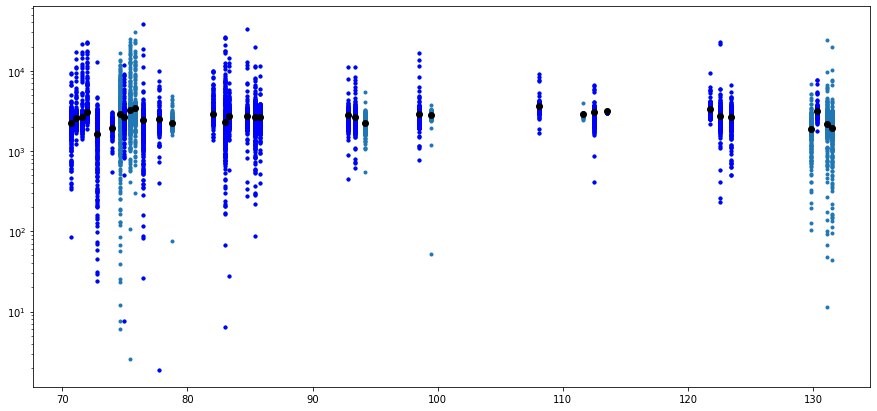

median FWHM  2718.9


In [10]:
# Median FWHM
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,7))
id1 = waveok == 1
id2 = np.isfinite(gratfwhm)
plt.plot(wavepos,gratfwhm,'.')
plt.plot(wavepos[waveok==1],gratfwhm[waveok==1],'.',color='blue')

s = np.argsort(wavepos)
swavepos = wavepos[s]
u, indices = np.unique(swavepos, return_inverse=True)
for uw in u:
    idu = wavepos == uw
    print('w, fwhm {0:.4f} {1:.0f}'.format(uw,np.nanmedian(gratfwhm[idu])))
    plt.plot([uw], np.nanmedian(gratfwhm[idu]),'ok')

plt.yscale('log')
plt.show()

print('median FWHM ', np.nanmedian(gratfwhm))

w, fwhm 70.7026 2213 0.29
w, fwhm 71.0673 2543 0.17
w, fwhm 71.5397 2629 0.21
w, fwhm 71.9466 3077 0.29
w, fwhm 72.7893 1616 0.40
w, fwhm 73.9602 1944 0.23
w, fwhm 74.6451 2901 0.49
w, fwhm 74.9450 2645 0.13
w, fwhm 75.3779 3234 0.17
w, fwhm 75.8311 3439 0.21
w, fwhm 76.4219 2444 0.19
w, fwhm 77.7615 2524 0.16
w, fwhm 78.7407 2204 0.53
w, fwhm 82.0315 2872 0.03
w, fwhm 82.9767 2312 0.34
w, fwhm 83.2840 2754 0.39
w, fwhm 84.7669 2742 0.29
w, fwhm 85.4248 2638 0.40
w, fwhm 85.7687 2634 0.26
w, fwhm 92.8108 2796 0.07
w, fwhm 93.3829 2667 0.13
w, fwhm 94.2096 2234 0.11
w, fwhm 98.4939 2902 0.08
w, fwhm 99.4926 2835 0.33
w, fwhm 108.0732 3625 0.26
w, fwhm 111.6242 2914 0.32
w, fwhm 112.5106 3082 0.15
w, fwhm 113.5374 3135 0.14
w, fwhm 121.7217 3380 0.34
w, fwhm 122.5221 2735 0.25
w, fwhm 123.4604 2664 0.16
w, fwhm 129.7905 1867 0.31
w, fwhm 130.3089 3105 0.34
w, fwhm 131.1272 2197 0.30
w, fwhm 131.5000 1960 0.52


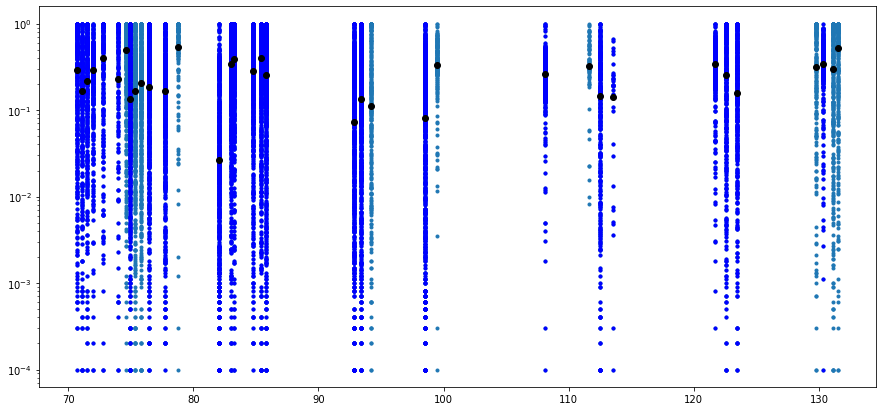

median FWHM  2718.9
median fraction  0.2258


In [13]:
# Median Voigt fraction
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,7))
id1 = waveok == 1
id2 = np.isfinite(gerrpos)
plt.plot(wavepos,fractions,'.')
plt.plot(wavepos[waveok==1],fractions[waveok==1],'.',color='blue')

s = np.argsort(wavepos)
swavepos = wavepos[s]
u, indices = np.unique(swavepos, return_inverse=True)
for uw in u:
    idu = wavepos == uw
    print('w, fwhm {0:.4f} {1:.0f} {2:.2f}'.format(uw,np.nanmedian(gratfwhm[idu]),np.nanmedian(fractions[idu])))
    plt.plot([uw], np.nanmedian(fractions[idu]),'ok')

plt.yscale('log')
plt.show()

print('median FWHM ', np.nanmedian(gratfwhm))
print('median fraction ', np.nanmedian(fractions))

## Approximation of g with parabola equivalent to complicate formula with cos(arctan)

With some algebra, transform it into a square root and then approximate with binomial series expansion:

$g = g_0 \cos (\arctan (\frac{slitPos-NP}{a})) = \frac {g_0}{\sqrt{1 + (\frac{slitPos-NP}{a})^2}} \approx g_0 (1 -\frac{1}{2} (\frac{slitPos-NP}{a})^2 )$

In fact:

$ \frac{1}{\sqrt{1+x^2}} = \sum_{k=0}^{\infty} (-1)^k \frac{\prod_{j=1}^{k} (1/2+j-1)}{k!} x^{2k} = 1 -\frac{x^2}{2}+\frac{3x^4}{8}-\frac{5x^4}{16}+\frac{35x^8}{128}+\dots$ for $|x| \le 1$

In our case, $(slitPos - NP) < 20$ and $a \approx 400$. So, just using the first two terms provides a very good approximation.

The original formula is therefore very well approximated by a parabola.

In [200]:
# 11   19.281910 4.547e-26 1.357e-04.06340.371 2552.85720.630.002600          0 1 0          0 1 0  7  4  3        6  5  2      5742233333287122 8    45.0   39.0
# 11   19.736723 5.588e-28 2.551e-05.05800.282 3244.59930.500.017810          0 0 0          0 0 0 14  7  8       15  4 11      574426333385641837    87.0   93.0
# 11   19.803988 6.540e-27 8.433e-05.08000.333 2670.78950.57-.002500          0 1 0          0 1 0  9  2  8        8  3  5      5742233333287122 8    19.0   17.0
# 11   19.849710 2.240e-25 1.841e-04.07290.391 2251.86230.67-.004100          0 1 0          0 1 0  6  3  4        5  4  1      5742233333257122 7    39.0   33.0
# 11   20.704358 5.672e-22 1.089e-04.08340.808  488.10770.79-.001469          0 0 0          0 0 0  5  3  2        4  4  1      574826333385691837    33.0   27.0

wcm = np.array([19.766111,19.801488,19.845610,20.016993,20.445100,20.702889,20.762297])
print(1/wcm*1.e3)

[50.59164142 50.50125526 50.38897771 49.95755356 48.91147512 48.3024374
 48.16422769]


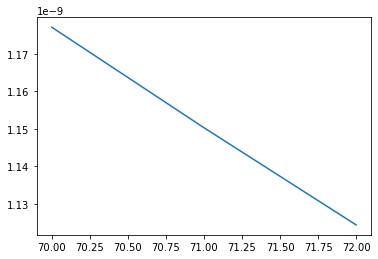

In [431]:
from astropy.modeling import models
from astropy import units as u

bb = models.BlackBody(temperature=300*u.K)
wav = np.arange(70, 73) * u.micron
flux = bb(wav)
plt.plot(wav, flux)

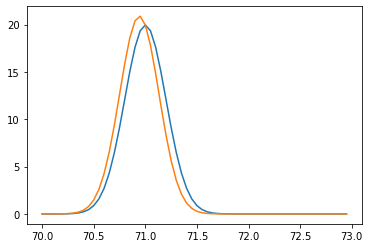

In [452]:
from scipy.special import erf
x = np.arange(70,73,0.05)
lc = 71
la = 10
ls = 0.2
gamma = 0
ls2 = np.sqrt(2) * ls
dx = (x - lc) / ls2
model = la / (ls2 * np.sqrt(np.pi)) * np.exp(-dx * dx) * (1 + erf(gamma*dx))
plt.plot(x, model)

gamma = -0.4
model = la / (ls2 * np.sqrt(np.pi)) * np.exp(-dx * dx) * (1 + erf(gamma*dx))
plt.plot(x, model)


ValueError: operands could not be broadcast together with shapes (431,) (447,) 

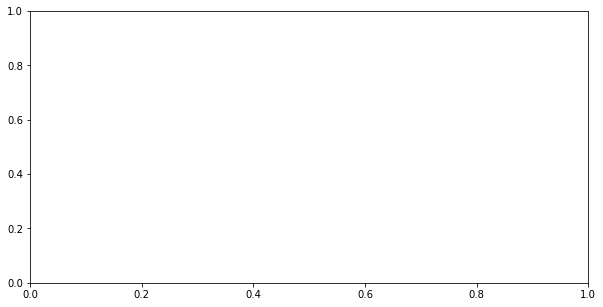

In [4]:
# Compute offsets between modules wrt the central module (12) ... (we can add this to the routine)
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,5))
idx12 = modules == 12
diff = []
for k in range(-12,13,1):
    idx12a = (modules == 12+k)
    diff.append(np.nanmean(gratpos[idx12a]-gratpos[idx12]))

plt.plot(np.arange(0,25), diff, 'o')                
plt.grid()
plt.show()

diff = np.array(diff)
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
s = np.argsort(slitPos)
fig,ax = plt.subplots(figsize=(10,5))
plt.plot(slitPos[s], diff[s],'o')
plt.grid()
plt.show()

## Wavelength calibration


3 variables: 

- gratpos,  position of a line on the grating

- order, Diffraction order

- pix, Pixel number (values: 1..16)


9 variable parameters and 1 fixed: 

- g Grating spacing (0.11765mm in Red, 0.083333mm in Blue)  # Use better values from previous fits

- $\phi$ Ideal Littrow angle

- $\gamma$ Deviation from $\phi$ of the inbound and outbound beams (estimates $1.2^o$ (Red) and $0.64^o$ (Blue))

- $\delta$ Pixel angle (deviation from the center of the detector)

- ISOFF InductoSyn Offset

- ISF InductoSyn factor, fixed to 1 *FIXED*

- QOFF  Offset from center

- PS, QS  Scaling factors

- NP  Neutral position



$\phi = 2 \pi  \frac{gratpos + ISOFF} {2^{24}} \, ISF$

$ s = \frac{pix - QOFF}{|pix - QOFF|}$

$\delta = (pix-8.5) \, PS + s \, (pix - QOFF)^2 \, QS$

$g = g_0 \cos(\arctan(\frac{slitPos - NP}{a}))$

$\lambda = 1000 \cdot \frac{g}{order} (\sin(\phi + \gamma + \delta) + \sin(\phi - \gamma))$



# Typical values from previous measurements

In [14]:
# Find typical values from previous fits

import pandas as pd
import numpy as np
wvdf = pd.read_csv('~/Python/fifipy/fifipy/data/CalibrationResults.csv', header=[0, 1])

ndates = (len(wvdf.columns) - 2) // 4
dates = np.zeros(ndates)
for i in range(ndates):
    dates[i] = wvdf.columns[2 + i * 4][0]


g0 = np.empty((ndates, 4)) 
NP = np.empty((ndates, 4)) 
a  = np.empty((ndates, 4)) 
ISF= np.empty((ndates, 4)) 
gamma= np.empty((ndates, 4)) 
PS = np.empty((ndates, 4)) 
QOFF= np.empty((ndates, 4)) 
QS= np.empty((ndates, 4)) 
ISOFF= np.empty((ndates, 4, 25))
    
for i, date in enumerate(dates):       
    cols = range(2 + 4 * i , 2 + 4 * i + 4)
    w1 = wvdf[wvdf.columns[cols]].copy()    
    for j in range(4):
        co = w1.columns[j]
        g0[i,j] = w1.iloc[0][co]
        NP[i,j] = w1.iloc[1][co]
        a[i,j]= w1.iloc[2][co]
        ISF[i,j] = w1.iloc[3][co]
        gamma[i,j] = w1.iloc[4][co]
        PS[i,j] = w1.iloc[5][co]
        QOFF[i,j] = w1.iloc[6][co]
        QS[i,j] = w1.iloc[7][co]
        ISOFF[i,j,:] = w1.iloc[8:][co].values


In [15]:
# 2002
print('gamma R105, R130, B1, B2', gamma[-1,:])
print('PS    R105, R130, B1, B2', PS[-1,:])
print('QOFF  R105, R130, B1, B2', QOFF[-1,:])
print('QS    R105, R130, B1, B2', QS[-1,:])
print('g0    R105, R130, B1, B2', g0[-1,:])
print('NP    R105, R130, B1, B2', NP[-1,:])
print('a     R105, R130, B1, B2', a[-1,:])
print('ISOFF R105, R130, B1, B2', ISOFF[-1,:,:])

gamma R105, R130, B1, B2 [0.01672   0.01672   0.0089008 0.0089008]
PS    R105, R130, B1, B2 [0.00058725 0.00058661 0.00055135 0.00055707]
QOFF  R105, R130, B1, B2 [6.43132815 6.41279394 6.76554683 6.47578507]
QS    R105, R130, B1, B2 [1.63524966e-06 1.75422448e-06 1.09427961e-05 7.62265104e-06]
g0    R105, R130, B1, B2 [0.11715587 0.11714915 0.08265614 0.08266067]
NP    R105, R130, B1, B2 [14.2983228  14.38387888 13.59708573 14.04656317]
a     R105, R130, B1, B2 [424.39436177 422.32884727 791.94675182 752.17373279]
ISOFF R105, R130, B1, B2 [[1151018.85546153 1151165.48553046 1151335.90476101 1151491.56907062
  1151686.60289121 1150378.70474825 1150438.61310697 1150534.99456112
  1150621.41361534 1150787.16709688 1149999.84125093 1149994.5304278
  1150010.25267645 1150024.40456741 1150175.60376506 1150257.12420037
  1150145.50770402 1150085.02465769 1150011.79997599 1150156.69211302
  1150959.55003475 1150802.38820545 1150648.80899207 1150502.84530206
  1150634.50300434]
 [1151274.01655

a, b, c 2.2575822172738875 -56.59167267473299 1075309.7173610772
a, b, c 2.2270937098641657 -55.33925182648668 1075427.5310698003
a, b, c 1.9237218163038652 -43.89139177115879 1075086.4434210917
a, b, c 2.412001276466584 -62.34145261227531 1075341.647848924
a, b, c 2.224928036505652 -55.12579377267236 1075366.4000526515
a, b, c 2.4007038230071553 -62.21423818131506 1075380.5622358073
a, b, c 2.21734725963356 -57.550357303440904 1075265.1124728066
a, b, c 2.271014241419852 -57.863352807663645 1074964.522152411
a, b, c 2.1627692149039817 -54.09126651568763 1074905.2276801036
a, b, c 2.1207900162418682 -51.82204295001718 1075299.0242688393
a, b, c 2.1654300427050255 -55.85014759377736 1075268.3076110755
[-258.04881172  -53.44382751    0.9087238    50.50108697  425.55698219
 -185.70929074  -33.69497542  -18.19496335   26.4389202   316.63904619
 -143.17299604  -39.18047949   15.21162265    9.6569573   213.22748723
  -86.86089338   26.81683061   32.44337077   24.67524844  216.62538125
 -106.

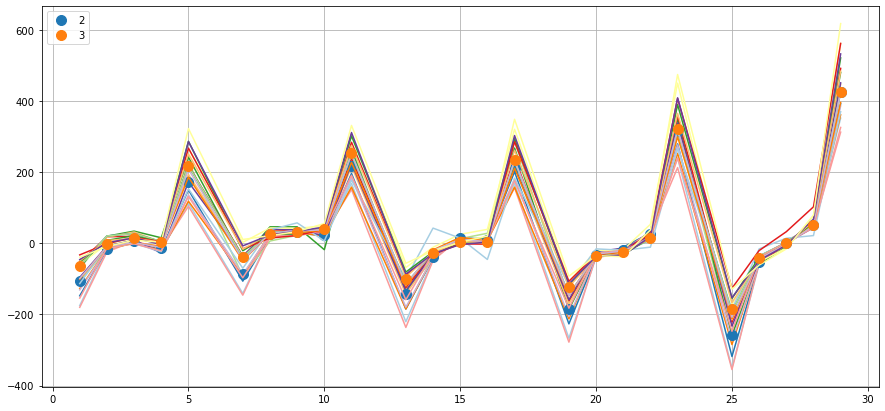

Parameters([('a', <Parameter 'a', value=2.3487370411315807 +/- 0.148, bounds=[-inf:inf]>), ('b', <Parameter 'b', value=-61.332560657955135 +/- 4.43, bounds=[-inf:inf]>), ('c', <Parameter 'c', value=1075268.138273895 +/- 26.9, bounds=[-inf:inf]>)])
center  13.056497935674862
ISOFF0  1075268.138273895


In [48]:
# Find a parabola fitting ISOFF
%matplotlib inline
import matplotlib.pyplot as plt
from lmfit.models import QuadraticModel # parameters a,b,c
from matplotlib.cm import get_cmap
name = "Paired"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors 
#print(colors)

module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5


fig,ax = plt.subplots(figsize=(15,7))
for band in [2,3]:
    residuals = []
    for k in range(-12,-1,1):
        #plt.plot(slitPos, ISOFF[k,0,:],'o',label=str(k),color=colors[k])
        x = slitPos.copy()
        y = ISOFF[k,band,:]
        mod = QuadraticModel()
        pars = mod.guess(y, x=x)
        out = mod.fit(y, pars, x=x)
        a,b,c = out.params['a'].value,out.params['b'].value,out.params['c'].value
        # Reject outliers 
        for kiter in range(5):
            res = y - (a*x**2+b*x+c)
            med = np.nanmedian(res)
            mad = np.nanmedian(np.abs(res - med))
            id3 = np.abs(res-med) < 3*mad
            pars = mod.guess(y[id3], x=x[id3])
            out = mod.fit(y[id3], pars, x=x[id3])
            a,b,c = out.params['a'].value,out.params['b'].value,out.params['c'].value
            x = x[id3]
            y = y[id3]
        print('a, b, c', a, b, c)
        x = slitPos.copy()
        fit = a*x**2+b*x+c
        s = np.argsort(x)
        plt.plot(slitPos[s], fit[s]-ISOFF[k,band,s],color=colors[k])
        residuals.append(fit-ISOFF[k,band,:])
    
    residuals = np.array(residuals)
    medres  = np.nanmedian(residuals, axis=0)
    plt.plot(x[s], medres[s], 'o',markersize=10, label=str(band))
    
    if band == 2:
        print(medres)

plt.legend()
plt.grid()
plt.show()
print(out.params)

a_ = out.params['a'].value
b_ = out.params['b'].value
c_ = out.params['c'].value
print('center ', -b_/(2*a_))
print('ISOFF0 ', c_)

Red  0.117155636858393
Blue 1,2 0.08265770670775549


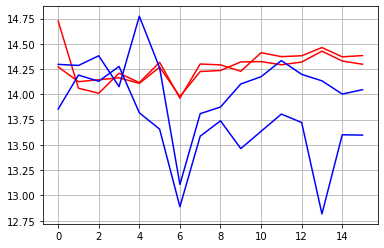

NP  14.1828039245294
NP red 14.29261142942465
NP blue 13.938936420808599


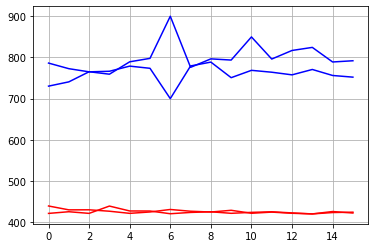

a red 424.68283902710357
a blue 774.798913792217


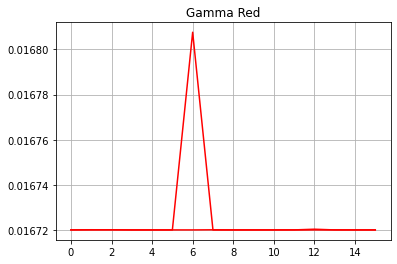

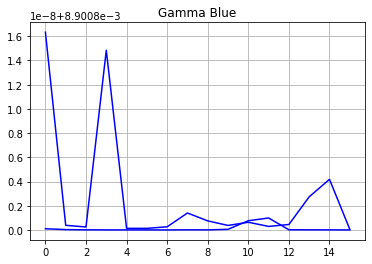

Red 0.0167200022792506
Blue 0.0089008001306208


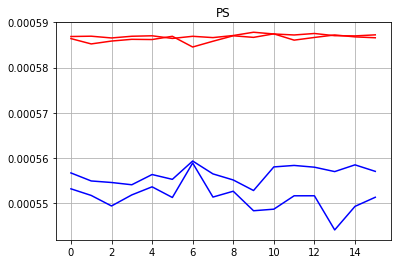

Red 0.00058690705057
Blue 0.0005538839053198


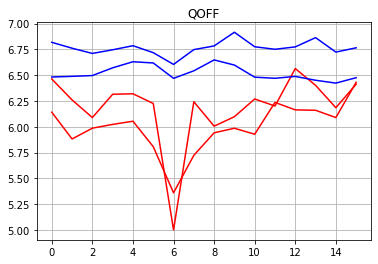

Red 6.1504546147044
Blue 6.63923949201131


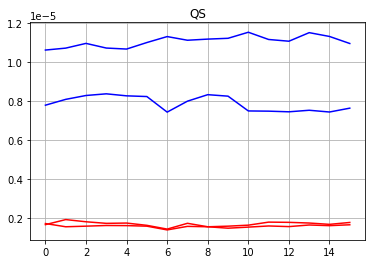

Red 1.60229454775e-06
Blue 9.48227661365e-06


In [55]:
# g0   Red 0.117155, Blue 0.082577
print('Red ', np.nanmedian(g0[:,0:2]))
print('Blue 1,2',np.nanmedian(g0[:,2:4]))
# NP  Red: 14.2926, Blue: 13.9389
plt.plot(NP[:,0],color='red')
plt.plot(NP[:,1],color='red')
plt.plot(NP[:,2],color='blue')
plt.plot(NP[:,3],color='blue')
plt.grid()
plt.show()
print('NP ', np.nanmedian(NP))
print('NP red', np.nanmedian(NP[:,0:2]))
print('NP blue', np.nanmedian(NP[:,2:4]))
# a Red: 424.6828, Blue: 774.7989
plt.plot(a[:,0],color='red')
plt.plot(a[:,1],color='red')
plt.plot(a[:,2],color='blue')
plt.plot(a[:,3],color='blue')
plt.grid()
plt.show()
print('a red', np.nanmedian(a[:,0:2]))
print('a blue', np.nanmedian(a[:,2:4]))
# gamma   Red: 0.0167200, Blue: 0.0089008
value = gamma.copy()
plt.plot(value[:,0],color='red')
plt.plot(value[:,1],color='red')
#plt.ylim(0.005,0.02)
plt.title('Gamma Red')
plt.grid()
plt.show()
plt.plot(value[:,2],color='blue')
plt.plot(value[:,3],color='blue')
#plt.ylim(0.005,0.02)
plt.title('Gamma Blue')
plt.grid()
plt.show()
print('Red', np.nanmedian(value[:,0:2]))
print('Blue', np.nanmedian(value[:,2:4]))
# PS   Red: 0.00058690, Blue: 0.000553883
value = PS.copy()
plt.plot(value[:,0],color='red')
plt.plot(value[:,1],color='red')
plt.plot(value[:,2],color='blue')
plt.plot(value[:,3],color='blue')
plt.title('PS')
plt.grid()
plt.show()
print('Red', np.nanmedian(value[:,0:2]))
print('Blue', np.nanmedian(value[:,2:4]))
#QOFF   Red: 6.150454, Blue: 6.6392394
value = QOFF.copy()
plt.plot(value[:,0],color='red')
plt.plot(value[:,1],color='red')
plt.plot(value[:,2],color='blue')
plt.plot(value[:,3],color='blue')
plt.title('QOFF')
plt.grid()
plt.show()
print('Red', np.nanmedian(value[:,0:2]))
print('Blue', np.nanmedian(value[:,2:4]))
#QS   Red: 1.60229e-06, Blue: 9.48227e-06
value = QS.copy()
plt.plot(value[:,0],color='red')
plt.plot(value[:,1],color='red')
plt.plot(value[:,2],color='blue')
plt.plot(value[:,3],color='blue')
plt.title('QS')
plt.grid()
plt.show()
print('Red', np.nanmedian(value[:,0:2]))
print('Blue', np.nanmedian(value[:,2:4]))

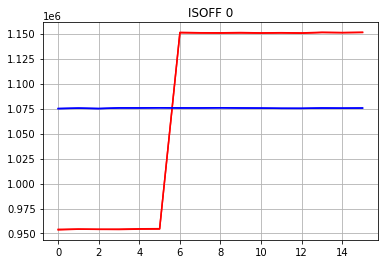

Red 0  1150750.9963338352
Blue 0  1075442.1681813751


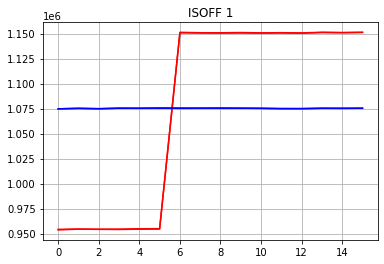

Red 1  1150895.388154205
Blue 1  1075375.1878877152


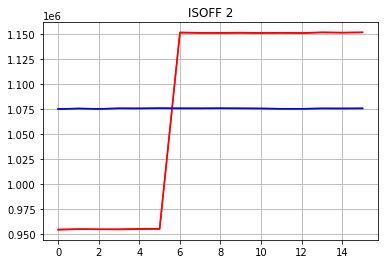

Red 2  1151063.0195313
Blue 2  1075393.640064435


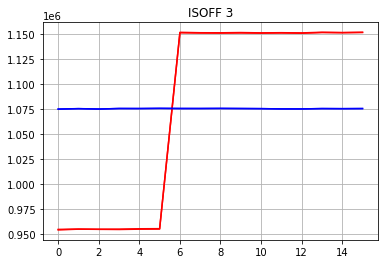

Red 3  1151224.76685606
Blue 3  1075389.85422053


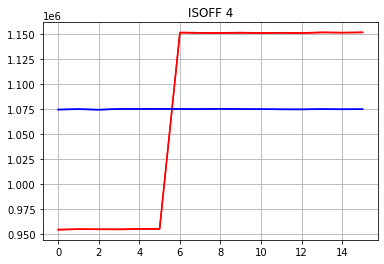

Red 4  1151416.80368341
Blue 4  1075013.457777275


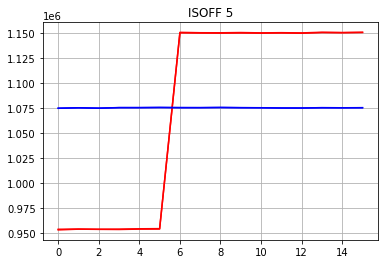

Red 5  1150115.9827864151
Blue 5  1075142.7329344451


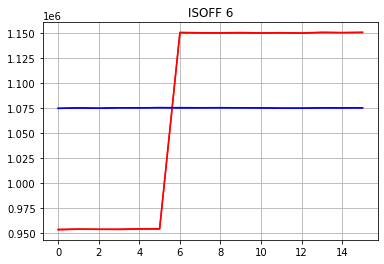

Red 6  1150170.16248234
Blue 6  1075069.951713215


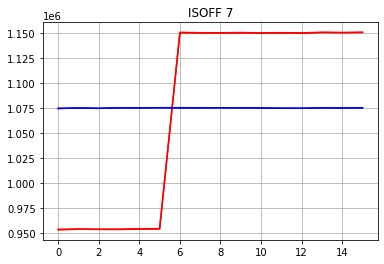

Red 7  1150269.34569939
Blue 7  1075101.9391553998


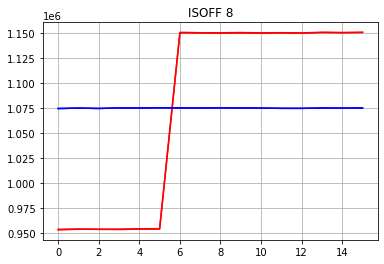

Red 8  1150356.902486805
Blue 8  1075084.36057851


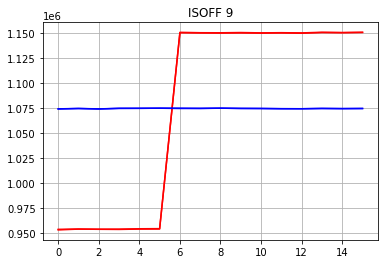

Red 9  1150519.810336285
Blue 9  1074782.04927868


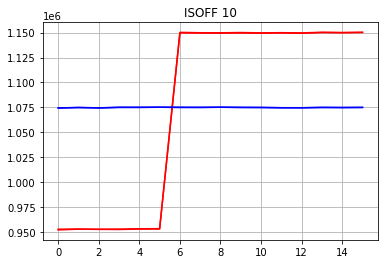

Red 10  1149736.3669404448
Blue 10  1075030.466678915


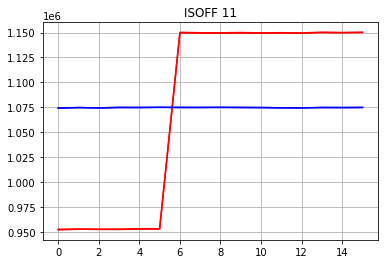

Red 11  1149725.81048102
Blue 11  1074949.560313185


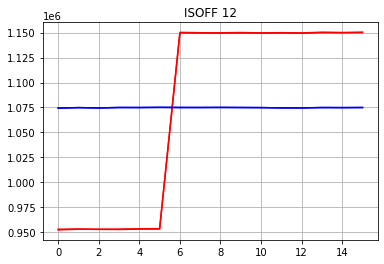

Red 12  1149741.250973415
Blue 12  1074921.09654512


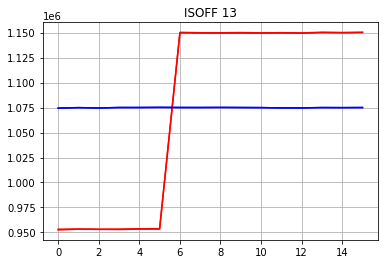

Red 13  1149761.162736225
Blue 13  1074929.1158354902


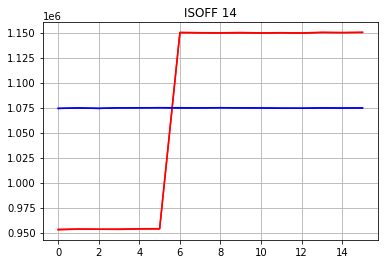

Red 14  1149915.4409830049
Blue 14  1074685.41105725


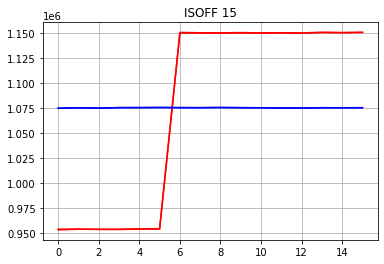

Red 15  1149981.8675698051
Blue 15  1075028.239877645


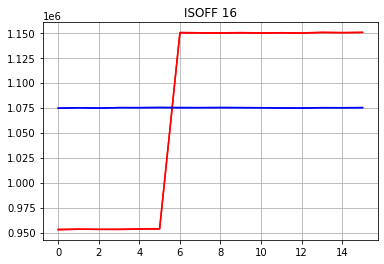

Red 16  1149871.661881865
Blue 16  1074937.8883206202


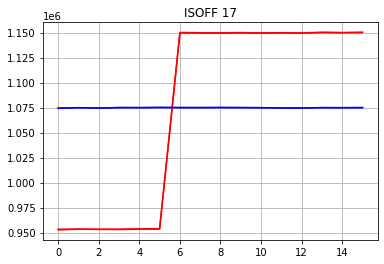

Red 17  1149814.189866975
Blue 17  1074914.118067885


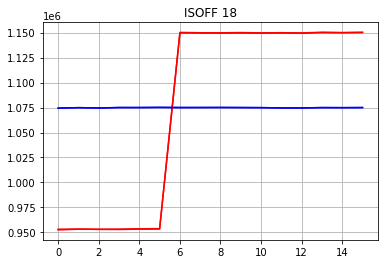

Red 18  1149748.209444795
Blue 18  1074909.2090512249


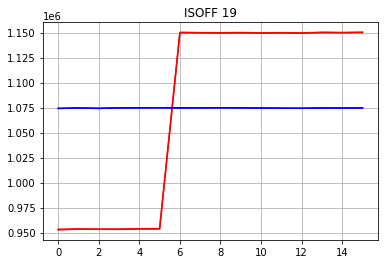

Red 19  1149909.3596942099
Blue 19  1074664.33089416


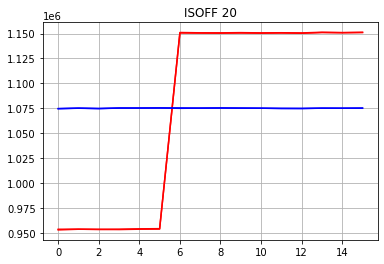

Red 20  1150687.638127685
Blue 20  1075314.066536085


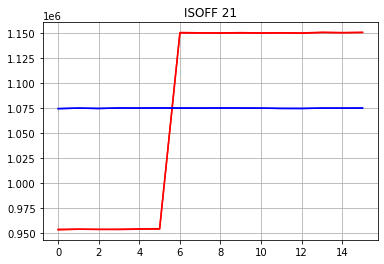

Red 21  1150520.45440686
Blue 21  1075188.44372838


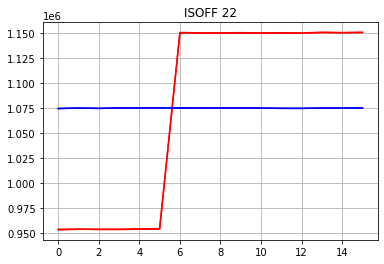

Red 22  1150368.6066522598
Blue 22  1075127.550033645


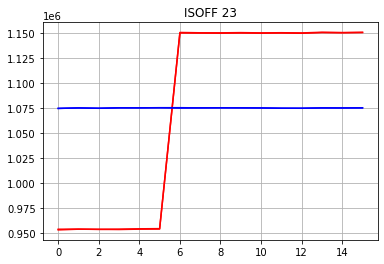

Red 23  1150234.564750805
Blue 23  1075098.31249897


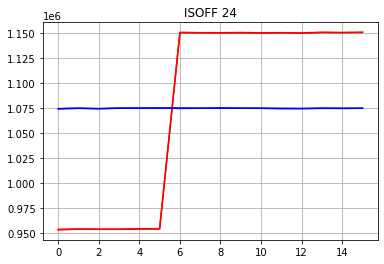

Red 24  1150382.87040619
Blue 24  1074820.154689125


In [61]:
# ISOFF
for k in range(25):
    plt.plot(ISOFF[:,0,k], color='red')
    plt.plot(ISOFF[:,1,k], color='red')
    plt.plot(ISOFF[:,2,k], color='blue')
    plt.plot(ISOFF[:,3,k], color='blue')
    plt.title('ISOFF '+str(k))
    plt.grid()
    plt.show()
    print('Red '+str(k)+' ', np.nanmedian(ISOFF[6:,0:2,k]))
    print('Blue '+str(k)+' ', np.nanmedian(ISOFF[6:,2:,k]))

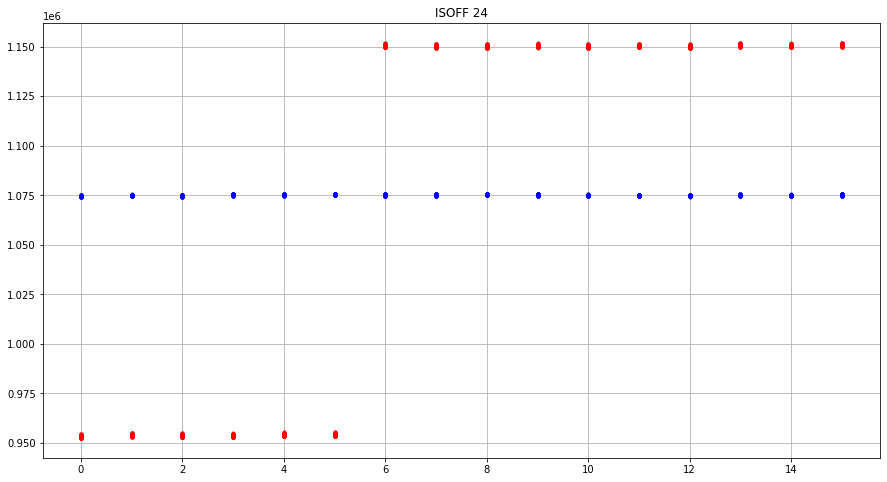

Red 1150258.03602117
Blue 1075018.64638198


In [64]:
# Total plot: Red: 1150258.0, Blue: 1075018.64
fig,ax = plt.subplots(figsize=(15,8))
for k in range(25):
    plt.plot(ISOFF[:,0,k], '.', color='red')
    plt.plot(ISOFF[:,1,k], '.', color='red')
    plt.plot(ISOFF[:,2,k], '.', color='blue')
    plt.plot(ISOFF[:,3,k], '.', color='blue')
    plt.title('ISOFF '+str(k))
plt.grid()
plt.show()

print('Red' , np.nanmedian(ISOFF[6:,0:2,:]))
print('Blue' , np.nanmedian(ISOFF[:,2:,:]))


In [ ]:
slitPos = 25 - 6 * (module // 5) + module % 5

phi = 2. * np.pi * ISF * (gratpos + ISOFF[module]) / 2.0 ** 24
sign = np.sign(pix - QOFF)
delta = (pix - 8.5) * PS + sign * (pix - QOFF) ** 2 * QS
g = g0 * np.cos(np.arctan2(slitPos - NP, a))  # Careful with arctan
lambd = 1000. * (g / order) * (np.sin(phi + gamma + delta) + np.sin(phi - gamma))

# Using sympy to compute the Jacobian

In [88]:
# Example
from sympy import *
b1, b2, x = symbols('b1 b2 x')
init_printing(use_unicode=True)
function = exp(-b1*x) * cos(b2*x)
Modeldb1 = diff(function, b1)
Modeldb2 = diff(function, b2)
print(Modeldb1)
print(Modeldb2)

-x*exp(-b1*x)*cos(b2*x)
-x*exp(-b1*x)*sin(b2*x)


In [89]:
# Variables:  gratpos, pix
# Parameters: ISOFF, QOFF, PS, QS, g0, NP, a, gamma
from sympy.functions import sign
from sympy.functions.elementary.trigonometric import atan2,cos,sin

ISOFF, QOFF, PS, QS, g0, NP, a, gamma, gratpos, pix, slitPos, c24 = symbols('I_{off}, Q_{off}, P, Q, g_0, N_{pos}, a, gamma, G_{pos}, p, S_{pos},c_{24}')
#init_printing(use_unicode=True)
init_printing(use_latex='mathjax')
#slitPos = 10
order=1
#c24 = 2^(-24)

phi = 2 * pi *  (gratpos + ISOFF) * c24
delta = (pix - 8.5) * PS + sign(pix - QOFF) * (pix - QOFF)**2 * QS
#g = g0 * cos(atan2(slitPos - NP, a))  # Careful with arctan
g = a * g0 / sqrt(a**2 + (NP - slitPos)**2)
model = 1000 * (g / order) * (sin(phi + gamma + delta) + sin(phi - gamma))
model_ISOFF = diff(model, ISOFF)
model_NP = diff(model, NP)
model_QOFF = diff(model, QOFF)
model_gamma = diff(model, gamma)
model_g0 = diff(model, g0)
model_a = diff(model, a)
model_PS = diff(model, PS)
display(model)
display(model_ISOFF)
display(model_NP)
display(model_QOFF)

          ⎛                                             ⎛                     
1000⋅a⋅g₀⋅⎝sin(2⋅π⋅c_{24}⋅(G_{pos} + I_{off}) - γ) + sin⎝P⋅(p - 8.5) + Q⋅(-Q_{
──────────────────────────────────────────────────────────────────────────────
                                                             _________________
                                                            ╱  2              
                                                          ╲╱  a  + (N_{pos} - 

         2                                                        ⎞⎞
off} + p) ⋅sign(-Q_{off} + p) + 2⋅π⋅c_{24}⋅(G_{pos} + I_{off}) + γ⎠⎠
────────────────────────────────────────────────────────────────────
__________                                                          
        2                                                           
S_{pos})                                                            

          ⎛                                                                   
1000⋅a⋅g₀⋅⎝2⋅π⋅c_{24}⋅cos(2⋅π⋅c_{24}⋅(G_{pos} + I_{off}) - γ) + 2⋅π⋅c_{24}⋅cos
──────────────────────────────────────────────────────────────────────────────
                                                                        ______
                                                                       ╱  2   
                                                                     ╲╱  a  + 

⎛                              2                                              
⎝P⋅(p - 8.5) + Q⋅(-Q_{off} + p) ⋅sign(-Q_{off} + p) + 2⋅π⋅c_{24}⋅(G_{pos} + I_
──────────────────────────────────────────────────────────────────────────────
_____________________                                                         
                   2                                                          
(N_{pos} - S_{pos})                                                           

          ⎞⎞
{off}) + γ⎠⎠
────────────
           

                               ⎛                                             ⎛
1000⋅a⋅g₀⋅(-N_{pos} + S_{pos})⋅⎝sin(2⋅π⋅c_{24}⋅(G_{pos} + I_{off}) - γ) + sin⎝
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                     ⎛ 2      
                                                                     ⎝a  + (N_

                              2                                               
P⋅(p - 8.5) + Q⋅(-Q_{off} + p) ⋅sign(-Q_{off} + p) + 2⋅π⋅c_{24}⋅(G_{pos} + I_{
──────────────────────────────────────────────────────────────────────────────
                  3/2                                                         
                2⎞                                                            
{pos} - S_{pos}) ⎠                                                            

         ⎞⎞
off}) + γ⎠⎠
───────────
           
  

          ⎛                2    ∂                                             
1000⋅a⋅g₀⋅⎜Q⋅(-Q_{off} + p) ⋅────────(sign(-Q_{off} + p)) + Q⋅(2⋅Q_{off} - 2⋅p
          ⎝                  ∂Q_{off}                                         
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              
                                                                              

                    ⎞    ⎛                              2                     
)⋅sign(-Q_{off} + p)⎟⋅cos⎝P⋅(p - 8.5) + Q⋅(-Q_{off} + p) ⋅sign(-Q_{off} + p) +
                    ⎠                                                         
──────────────────────────────────────────────────────────────────────────────
      ___________________________                                             
     ╱  2                      2                   

In [7]:
from sympy import *
from sympy.functions import sign
from sympy.functions.elementary.trigonometric import atan2,cos,sin

ISOFF, QOFF, PS, QS, g, NP, a, gamma, gratpos, pix, slitPos, f, lambd = symbols('I_{off}, Q_{off}, P, Q, g, N_{pos}, a, gamma, G_{pos}, p, S_{pos},f,$\\lambda$')
#init_printing(use_unicode=True)
init_printing(use_latex='mathjax')
#slitPos = 10
order=2
#c24 = 2^(-24)

phi = f *   (gratpos + ISOFF) 
delta = (pix - 8.5) * PS + sign(pix - QOFF) * (pix - QOFF)**2 * QS
#delta = (pix - 8.5) * PS +  (pix - QOFF)**3 * QS
model = 1000 * (g / order) * (sin(phi + gamma + delta) + sin(phi - gamma))
model_ISOFF = diff(model, ISOFF)
model_QOFF = diff(model, QOFF)
model_gamma = diff(model, gamma)
model_g = diff(model, g)
model_PS = diff(model, PS)
display(model)
display(model_g)
display(model_ISOFF)
display(model_gamma)
display(model_PS)
display(model_QOFF)
alpha = phi + gamma + delta
display(diff(delta, QOFF))
display(diff(model, QS))

# Try to invert the equation
#expr = lambd - model
#solve(expr, gratpos)


      ⎛                                    ⎛                              2   
500⋅g⋅⎝sin(f⋅(G_{pos} + I_{off}) - γ) + sin⎝P⋅(p - 8.5) + Q⋅(-Q_{off} + p) ⋅si

                                            ⎞⎞
gn(-Q_{off} + p) + f⋅(G_{pos} + I_{off}) + γ⎠⎠

                                            ⎛                              2  
500⋅sin(f⋅(G_{pos} + I_{off}) - γ) + 500⋅sin⎝P⋅(p - 8.5) + Q⋅(-Q_{off} + p) ⋅s

                                             ⎞
ign(-Q_{off} + p) + f⋅(G_{pos} + I_{off}) + γ⎠

      ⎛                                        ⎛                              
500⋅g⋅⎝f⋅cos(f⋅(G_{pos} + I_{off}) - γ) + f⋅cos⎝P⋅(p - 8.5) + Q⋅(-Q_{off} + p)

2                                               ⎞⎞
 ⋅sign(-Q_{off} + p) + f⋅(G_{pos} + I_{off}) + γ⎠⎠

      ⎛                                     ⎛                              2  
500⋅g⋅⎝-cos(f⋅(G_{pos} + I_{off}) - γ) + cos⎝P⋅(p - 8.5) + Q⋅(-Q_{off} + p) ⋅s

                                             ⎞⎞
ign(-Q_{off} + p) + f⋅(G_{pos} + I_{off}) + γ⎠⎠

                   ⎛                              2                           
500⋅g⋅(p - 8.5)⋅cos⎝P⋅(p - 8.5) + Q⋅(-Q_{off} + p) ⋅sign(-Q_{off} + p) + f⋅(G_

                    ⎞
{pos} + I_{off}) + γ⎠

      ⎛                2    ∂                                                 
500⋅g⋅⎜Q⋅(-Q_{off} + p) ⋅────────(sign(-Q_{off} + p)) + Q⋅(2⋅Q_{off} - 2⋅p)⋅si
      ⎝                  ∂Q_{off}                                             

                ⎞    ⎛                              2                         
gn(-Q_{off} + p)⎟⋅cos⎝P⋅(p - 8.5) + Q⋅(-Q_{off} + p) ⋅sign(-Q_{off} + p) + f⋅(
                ⎠                                                             

                      ⎞
G_{pos} + I_{off}) + γ⎠
                       

                2    ∂                                                        
Q⋅(-Q_{off} + p) ⋅────────(sign(-Q_{off} + p)) + Q⋅(2⋅Q_{off} - 2⋅p)⋅sign(-Q_{
                  ∂Q_{off}                                                    

         
off} + p)
         

                    2    ⎛                              2                     
500⋅g⋅(-Q_{off} + p) ⋅cos⎝P⋅(p - 8.5) + Q⋅(-Q_{off} + p) ⋅sign(-Q_{off} + p) +

                          ⎞                   
 f⋅(G_{pos} + I_{off}) + γ⎠⋅sign(-Q_{off} + p)

In [64]:
simplify(g0 * cos(atan2(slitPos - NP, a)))

             a⋅g₀             
──────────────────────────────
   ___________________________
  ╱  2                      2 
╲╱  a  + (N_{pos} - S_{pos})  

In [57]:
simplify(model)

⎧                  1000⋅a⋅g₀⋅(sin(2⋅c_{24}⋅π⋅(G_{pos} + I_{off}) - γ) + sin(P⋅
⎪                  ───────────────────────────────────────────────────────────
⎪                                                              _______________
⎪                                                             ╱  2            
⎪                                                           ╲╱  a  + (NP - S_{
⎪                                                                             
⎪           ⎛   ⎛               3                                             
⎨           ⎜   ⎜Q⋅(Q_{off} - p)  - (P⋅(p - 8.5) + 2⋅c_{24}⋅π⋅(G_{pos} + I_{of
⎪-1000⋅a⋅g₀⋅⎜sin⎜─────────────────────────────────────────────────────────────
⎪           ⎝   ⎝                                   │Q_{off} - p│             
⎪─────────────────────────────────────────────────────────────────────────────
⎪                                                              _______________
⎪                                                   

In [25]:
from sympy import *
from sympy.functions import sign
from sympy.functions.elementary.trigonometric import atan2,cos,sin
init_printing(use_latex='mathjax')

alpha, beta, gamma = symbols('\\alpha,\\beta,\\gamma')

simplify(sin(beta-gamma) + sin(beta+gamma))


2⋅sin(\beta)⋅cos(\gamma)

# Difference between dichroics

Study of systematic difference of grating position for line with dichroic 130 and 105 in the Red.

In [ ]:

from glob import glob as gb
import pandas as pd
import numpy as np

rootdir = '../202002WaveCalData/Reduced/'

channel = 'R'
dichroic = '105'
#infiles = gb(rootdir+channel+'1_'+dichroic+'_*.csv')
infiles = gb(rootdir+channel+'1_*_*.csv')
module = []
pixel = []
wavepos = []
gratpos = []
print('Number of files ', len(infiles))
for infile in infiles:  
    lines = pd.read_csv(infile, delimiter=',',header=0,
                    names=['module','pixel','wavepos','gratpos'])
    module.append(lines.module.values)
    pixel.append(lines.pixel.values)
    wavepos.append(lines.wavepos.values)
    gratpos.append(lines.gratpos.values)
    
module105 = np.concatenate(module)
pixel105 = np.concatenate(pixel)
wavepos = np.concatenate(wavepos)
gratpos = np.concatenate(gratpos)




# Using grade 3 instead of 2 (with sign)

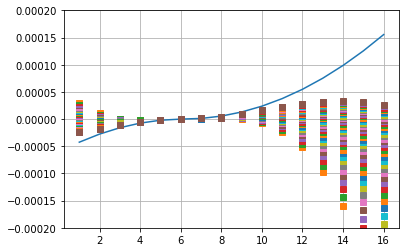

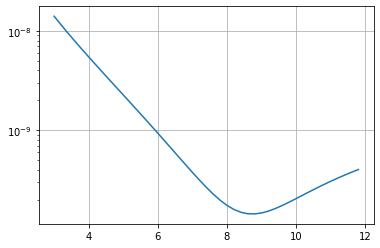

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
PS = 0.00058690
QS = 1.60229e-06
QOFF = 6.150454
pix = np.arange(16)+1
delta0= PS * (pix - 8.5)
delta1 = PS * (pix - 8.5) + QS * (pix - QOFF)**2 * np.sign(pix - QOFF)
#plt.plot(pix, delta-delta1,'o')
plt.plot(pix, delta1 - delta0)
diff = []
for n in np.arange(3,12,0.2):
    #delta2 = PS * (pix - 8.5) + QS/n * (pix - 8.5)**3 
    delta2 = PS * (pix - 8.5) + QS/n * (pix - QOFF)**3 
    plt.plot(pix, delta1-delta2,'s',label = str(n))
    diff.append(np.mean((delta1-delta2)**2))
#plt.legend()
plt.grid()
plt.ylim(-0.0002,0.0002)
plt.show()

imin = np.argmin(diff)
nn = np.arange(3,12,0.2)
print
plt.plot(nn, diff)
plt.yscale('log')
plt.grid()
plt.show()

In [6]:
# Can we get starting conditions from list of lines ?
from lmfit import Parameters, minimize
import numpy.ma as ma
from scipy.signal import medfilt

def linesGaussResiduals(p, x, data=None, eps=None):
    # unpack parameters:
    # extract .value attribute for each parameter
    v = p.valuesdict()
    n = (len(v) - 2)// 3
    s2 = np.sqrt(2)
    s2pi = s2 * np.pi
    model = v['intercept'] + x * v['slope'] #+ x*x*v['quad']
    for i in range(n):
        li = 'l' + str(i) + '_'
        lc = v[li + 'center']
        la = v[li + 'amplitude']
        ls = v[li + 'sigma']
        dx = (x - lc) / (s2 * ls)
        model += la / (s2pi * ls) * np.exp(-dx**2)
    if data is None:
        return model
    else:
        if eps is None:
            return (model - data)
        else:
            return (model - data) / eps

def linesVoigtResiduals(p, x, data=None, eps=None):
    """Pseudo-Voigt function."""
    v = p.valuesdict()
    n = (len(v)-2) // 4
    model = v['intercept'] + x * v['slope'] #+ x*x*v['quad']
    s2pi = np.sqrt(2 * np.pi)
    for i in range(n):
        li = 'l' + str(i) + '_'
        xc = v[li + 'center']
        A = v[li + 'amplitude']
        sigma = v[li + 'sigma']
        alpha = v[li + 'alpha']
        xx2 = (x - xc)**2
        sigmag = sigma/np.sqrt(2*np.log(2.))
        gauss = np.exp(-xx2 / (2 * sigmag**2)) / (s2pi * sigmag)
        cauchy = sigma / np.pi / (xx2 + sigma**2)
        model += A * ((1-alpha)* gauss + alpha*cauchy)
    if data is None:
        return model
    else:
        if eps is None:
            return (model - data)
        else:
            return (model - data) / eps

def linesSplitVoigtResiduals(p, x, data=None, eps=None):
    """Pseudo-Voigt function."""
    v = p.valuesdict()
    n = (len(v)-2) // 5
    model = v['intercept'] + x * v['slope'] #+ x*x*v['quad']
    s2pi = np.sqrt(2 * np.pi)
    for i in range(n):
        li = 'l' + str(i) + '_'
        xc = v[li + 'center']
        A = v[li + 'amplitude']
        sigma = v[li + 'sigma']
        sigmar = v[li + 'sigma_r']
        alpha = v[li + 'alpha']
        xx2 = (x - xc)**2
        sigmag = sigma/np.sqrt(2*np.log(2.))
        sigmagr = sigmar/np.sqrt(2*np.log(2.))
        gauss = np.exp(-xx2 / (2 * sigmag**2)) / (s2pi * sigmag) * (x<center)
        cauchy = sigma / np.pi / (xx2 + sigma**2) * (x<center)
        gaussr = np.exp(-xx2 / (2 * sigmagr**2)) / (s2pi * sigmagr) * (x>=center)
        cauchyr = sigmar / np.pi / (xx2 + sigmar**2) * (x>=center)
        model += A * ((1-alpha)* (gauss+gaussr) + alpha*(cauchy+cauchyr))
    if data is None:
        return model
    else:
        if eps is None:
            return (model - data)
        else:
            return (model - data) / eps
        
        
def linesSkewedGaussResiduals(p, x, data=None, eps=None):
    # unpack parameters:
    # extract .value attribute for each parameter
    from scipy.special import erf
    v = p.valuesdict()
    n = (len(v) - 2 )// 4
    model = v['intercept'] + x * v['slope'] #+ x*x*v['quad']
    for i in range(n):
        li = 'l' + str(i) + '_'
        lc = v[li + 'center']
        la = v[li + 'amplitude']
        ls = v[li + 'sigma']
        gamma = v[li + 'gamma']
        ls2 = np.sqrt(2) * ls
        dx = (x - lc) / ls2
        model += la / (ls2 * np.sqrt(np.pi)) * np.exp(-dx * dx) * (1 + erf(gamma*dx))
    if data is None:
        return model
    else:
        if eps is None:
            return (model - data)
        else:
            return (model - data) / eps

def linesSkewedVoigtResiduals(p, x, data=None, eps=None):
    """Pseudo-Voigt function."""
    from scipy.special import erf
    v = p.valuesdict()
    n = (len(v)-2) // 5
    model = v['intercept'] + x * v['slope'] #+ x*x*v['quad']
    s2pi = np.sqrt(2*np.pi) 
    for i in range(n):
        li = 'l' + str(i) + '_'
        xc = v[li + 'center']
        A = v[li + 'amplitude']
        sigma = v[li + 'sigma']
        alpha = v[li + 'alpha']
        gamma = v[li + 'gamma']
        sigmag = sigma/np.sqrt(2*np.log(2.))
        xx2 = (x - xc)**2
        dx = (x - xc) / (sigma * np.sqrt(2))
        gauss = np.exp(-xx2 / (2 * sigmag**2)) / (s2pi * sigmag)
        cauchy = sigma / np.pi / (xx2 + sigma**2)
        model += A * ((1-alpha) * gauss + alpha * cauchy) * (1 + erf(gamma*dx))
    if data is None:
        return model
    else:
        if eps is None:
            return (model - data)
        else:
            return (model - data) / eps

# Pixel      
i = 0 # spectral pixel
j =5# spatial pixel


# Range of wavelengths
wrange = [np.nanmin(w), np.nanmax(w)]
print('wavelength range ', wrange)

# Lines in the interval
wlines = lines.wave.values
fwhms  = lines.fwhm_h2o.values
idx =  (wrange[0] < wlines) & (wlines < wrange[1])
print('Lines in interval, FWHM(H2O) ', wlines[idx], fwhms[idx])


# Find approximate value in grating position
# Interpolation
interpg = np.interp(wlines[idx], w[:,j,i], g)
print('g center ', interpg)
interpg_ = np.interp(wlines[idx]-fwhms[idx], w[:,j,i], g)
dg = np.abs(interpg_-interpg)
print('FWHM-g ', dg)

# Fit with new guess values
cen = interpg
wid = dg

x = g.copy()
y = specs[:,i,j].copy()


# Eliminate outliers
#spec = specs[:,i,j]
for k in range(2):
    dy = y - medfilt(y,3)
    y3 = np.abs(dy) > 3*np.std(dy)
    y[y3] = np.nan 
# Eliminate negative values
y3 = y < 0
y[y3] = np.nan

idnan = np.isfinite(y)
if np.sum(~idnan) > 0:
    ispec = np.interp(g[~idnan], g[idnan],y[idnan])
    y[~idnan] = ispec

# Estimate of intercept
intercept = np.nanmedian(y)
fig,ax = plt.subplots(figsize=(15,7))
plt.plot(x, y, '.',label = 'data')


# Define the model
fit_params = Parameters()
fit_params.add('slope', value=0)
fit_params.add('intercept', value=intercept)
#fit_params.add('quad', value=0)
# Define lines
for k, (c,d) in enumerate(zip(cen,wid)):
    li = 'l' + str(k) + '_'
    plt.axvline(c)
    if d < 4000:
        d = 4000
    mask = (x < c-d) | (x > c+d)
    ymasked = ma.masked_array(medfilt(y,3), mask)
    imax = np.nanargmax(ymasked)
    a = y[imax]
    #c = g[imax]
    print(k,a,c)
    plt.plot([c],[a],'ok')
    #plt.plot(x,ymasked)
    #plt.show()
    a -= intercept
    a *= np.sqrt(2*np.pi) * d
    fit_params.add(li + 'center', value=c)
    fit_params.add(li + 'amplitude', value=a, min=0.1 * a, max=a * 10)
    fit_params.add(li + 'sigma', value=d/2.355)
    fit_params.add(li + 'sigma_r', value=d/2.355)
    #fit_params.add(li + 'gamma', value = 0)
    fit_params.add(li + 'alpha', value = 0.5)

kws = {'data': y}
#out = minimize(linesSkewedGaussResiduals, fit_params, args=(x,), kws=kws, method='leastsq')
#out = minimize(linesGaussResiduals, fit_params, args=(x,), kws=kws, method='leastsq')
out = minimize(linesSplitVoigtResiduals, fit_params, args=(x,), kws=kws, method='leastsq')
#out = minimize(linesSkewedVoigtResiduals, fit_params, args=(x,), kws=kws, method='leastsq')
pars = out.params

#print('Parameters ', pars)

#plt.plot(x, linesSkewedGaussResiduals(pars, x), label='bo')
#plt.plot(x, linesGaussResiduals(pars, x), label='fit')
plt.plot(x, linesSplitVoigtResiduals(pars, x), label='fit')
#plt.plot(x, linesSkewedVoigtResiduals(pars, x), label='fit')
plt.legend(loc='best')
plt.grid()
plt.show()

fig,ax = plt.subplots(figsize=(15,7))
plt.plot(w[:,j,i],y)
#plt.plot(w[:,j,i], linesSkewedGaussResiduals(pars, x), label='bo')
#plt.plot(w[:,j,i], linesGaussResiduals(pars, x), label='bo')
plt.plot(w[:,j,i], linesSplitVoigtResiduals(pars, x), label='bo')
#plt.plot(w[:,j,i], linesSkewedVoigtResiduals(pars, x), label='bo')
plt.xlim(132,132.3)
plt.grid()
plt.show()

#for k in range(len(cen)):
#    print('Gamma ', pars['l'+str(k)+'_alpha'].value)

NameError: name 'np' is not defined